<a href="https://colab.research.google.com/github/rustproofpanda0/test_task/blob/main/test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model, preprocessing, metrics
from sklearn import tree, ensemble

In [2]:
pd.set_option('display.max_columns', None)  # or 1000


#отображение всехстрок таблицы или небольшой их части

# переклчал по необходимости

pd.set_option('display.max_rows', 150)  # or 1000
# pd.set_option('display.max_rows', None)

In [3]:
energy_df = pd.read_csv('energy.csv', sep='\t')
plan_df_full = pd.read_csv('plan.csv', sep='\t')

In [4]:
energy_df # при просмотре файлов замечаем, что в energy.csv необходимо заменить запятые на точки

Дата Характерный день  Торговый час Характерный час  \
0      01.01.2015         выходной             0         минимум   
1      01.01.2015         выходной             1         минимум   
2      01.01.2015         выходной             2         минимум   
3      01.01.2015         выходной             3         минимум   
4      01.01.2015         выходной             4         минимум   
...           ...              ...           ...             ...   
26299  31.12.2017         выходной            19         полупик   
26300  31.12.2017         выходной            20         полупик   
26301  31.12.2017         выходной            21         полупик   
26302  31.12.2017         выходной            22         минимум   
26303  31.12.2017         выходной            23         минимум   

      График ППП, МВтч  \
0                 0,45   
1                 0,45   
2                 0,45   
3                 0,45   
4                 0,45   
...                ...   
26299                0   
26300                0   
26301                0   
26302                0   
26303                0   

      Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
0                                                   0,45                                   
1                                                   0,45                                   
2                                                   0,45                                   
3                                                   0,45                                   
4                                                   0,45                                   
...                                                  ...                                   
26299                                                  0                                   
26300                                                  0                                   
26301                                                  0                                   
26302                                                  0                                   
26303                                                  0                                   

      Объем покупки МВт*час В т.ч. потери, отнесенные к объему покупки  \
0                     0,463                                      0,013   
1                     0,463                                      0,013   
2                     0,463                                      0,013   
3                     0,463                                      0,013   
4                     0,463                                      0,013   
...                     ...                                        ...   
26299                     0                                          0   
26300                     0                                          0   
26301                     0                                          0   
26302                     0                                          0   
26303                     0                                          0   

      Фактическое собственное потребление, МВтч  \
0                                         0,362   
1                                         0,355   
2                                         0,355   
3                                         0,355   
4                                         0,364   
...                                         ...   
26299                                     0,159   
26300                                     0,152   
26301                                     0,154   
26302                                     0,146   
26303                                     0,145   

      Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
0                                            -0,088   
1                                            -0,095   
2                                            -0,095   
3                                            -0,095   
4

In [5]:
energy_df.dtypes # просматриваем типы данных в столбцах

Дата                                                                                  object
Характерный день                                                                      object
Торговый час                                                                           int64
Характерный час                                                                       object
График ППП, МВтч                                                                      object
Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час    object
Объем покупки МВт*час                                                                 object
В т.ч. потери, отнесенные к объему покупки                                            object
Фактическое собственное потребление, МВтч                                             object
Покупка (+) / Продажа (-) на БР (BR+/-), МВтч                                         object
Объем покупки на БР (BR+), МВтч                                       

In [6]:
str_mask = energy_df.dtypes == 'object' # для столбцов с типом object (все их них str) меняем запятые на точки
for col in energy_df.columns[str_mask]:
    energy_df[col] = energy_df[col].str.replace(',', '.')

In [8]:
cols_to_float = energy_df.columns[4:]
for col in cols_to_float:
    print(col)
    energy_df[col] = energy_df[col].astype(float)

График ППП, МВтч
Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час
Объем покупки МВт*час
В т.ч. потери, отнесенные к объему покупки
Фактическое собственное потребление, МВтч
Покупка (+) / Продажа (-) на БР (BR+/-), МВтч
Объем покупки на БР (BR+), МВтч
Объем продажи на БР (BR-), МВтч


ValueError: ignored

In [9]:
# пока что переведём в float то, что можно перевести
# код выше падает на последнем столбце, следовательно проблемы только в нём

cols_to_float = energy_df.columns[4:-1]
for col in cols_to_float:
    energy_df[col] = energy_df[col].astype(float)

In [10]:
# Просмотрев таблицу, увидим, что проблема последнего столбца
# в символах ' -     ' , которые стоят, предположительно, вместо нулей.
# проверим это

dash_tst_df = energy_df[energy_df['Объем продажи на БР (BR-), МВтч'] == ' -      ']

switch = True
for i in dash_tst_df['Покупка (+) / Продажа (-) на БР (BR+/-), МВтч'] >= 0:
    if (not i):
        print('less then 0')
        switch = False

# условие не сработало, следовательно на месте ' -     ' должны быть нули

if (switch):
    energy_df.replace(' -      ', '0.0', inplace=True)
    energy_df['Покупка (+) / Продажа (-) на БР (BR+/-), МВтч'] = energy_df[
              'Покупка (+) / Продажа (-) на БР (BR+/-), МВтч'].astype(float)

In [11]:
print(energy_df['Характерный час'].unique()) # проверяем остальные столбцы на наличие неправильных данных
print(energy_df['Характерный день'].unique())
print(energy_df['Торговый час'].unique())
# пока что оставим категориальные данные в таком виде

['минимум' 'полупик' 'пик']
['выходной' 'рабочий день']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [12]:
energy_df.dtypes # проверяем типы данных полученной таблицы

Дата                                                                                   object
Характерный день                                                                       object
Торговый час                                                                            int64
Характерный час                                                                        object
График ППП, МВтч                                                                      float64
Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час    float64
Объем покупки МВт*час                                                                 float64
В т.ч. потери, отнесенные к объему покупки                                            float64
Фактическое собственное потребление, МВтч                                             float64
Покупка (+) / Продажа (-) на БР (BR+/-), МВтч                                         float64
Объем покупки на БР (BR+), МВтч                             

In [13]:
energy_df['Дата'] = pd.to_datetime(energy_df['Дата'], dayfirst=True)
energy_df.rename({'Дата': 'DateTime'}, axis=1, inplace=True)

In [14]:
energy_df # проверяем полученную талбицу

DateTime Характерный день  Торговый час Характерный час  \
0     2015-01-01         выходной             0         минимум   
1     2015-01-01         выходной             1         минимум   
2     2015-01-01         выходной             2         минимум   
3     2015-01-01         выходной             3         минимум   
4     2015-01-01         выходной             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       График ППП, МВтч  \
0                  0.45   
1                  0.45   
2                  0.45   
3                  0.45   
4                  0.45   
...                 ...   
26299              0.00   
26300              0.00   
26301              0.00   
26302              0.00   
26303              0.00   

       Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
0                                                   0.45                                    
1                                                   0.45                                    
2                                                   0.45                                    
3                                                   0.45                                    
4                                                   0.45                                    
...                                                  ...                                    
26299                                               0.00                                    
26300                                               0.00                                    
26301                                               0.00                                    
26302                                               0.00                                    
26303                                               0.00                                    

       Объем покупки МВт*час  В т.ч. потери, отнесенные к объему покупки  \
0                      0.463                                       0.013   
1                      0.463                                       0.013   
2                      0.463                                       0.013   
3                      0.463                                       0.013   
4                      0.463                                       0.013   
...                      ...                                         ...   
26299                  0.000                                       0.000   
26300                  0.000                                       0.000   
26301                  0.000                                       0.000   
26302                  0.000                                       0.000   
26303                  0.000                                       0.000   

       Фактическое собственное потребление, МВтч  \
0                                          0.362   
1                                          0.355   
2                                          0.355   
3                                          0.355   
4                                          0.364   
...                                          ...   
26299                                      0.159   
26300                                      0.152   
26301                                      0.154   
26302                                      0.146   
26303                                      0.145   

       Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
0                                             -0.088   
1                                             -0.095   
2                                             -0.095   

In [15]:
plan_df_full # теперь рассмотрим следующую таблицу

 # она содержит не только планы производства, но и фактические велечины, которыми пользоваться нельзя

DateTime product_1_plan product_1_plan_cumsum  product_1_fact  \
0    2015-09-01          *1500                  1500        1317.735   
1    2015-09-02            800                  2300         755.753   
2    2015-09-03            800                  3100         729.503   
3    2015-09-04            800                  3900         836.252   
4    2015-09-05            800                  4700         707.373   
..          ...            ...                   ...             ...   
848  2017-12-27              0                 10000           0.000   
849  2017-12-28              0                 10000           0.000   
850  2017-12-29              0                 10000           0.000   
851  2017-12-30              0                 10000           0.000   
852  2017-12-31              0                 10000           0.000   

     product_1_fact_cumsum product_2_status  product_2_plan  \
0                 1317.735              NaN           100.0   
1                 2073.488              NaN           950.0   
2                 2802.991              NaN           950.0   
3                 3639.243              NaN           950.0   
4                 4346.616              NaN           950.0   
..                     ...              ...             ...   
848              10477.026           ремонт             NaN   
849              10477.026           ремонт             NaN   
850              10477.026           ремонт             NaN   
851              10477.026              NaN             0.0   
852              10477.026              NaN             0.0   

     product_2_plan_cumsum  product_2_fact  product_2_fact_cumsum  \
0                    100.0         530.009                530.009   
1                   1050.0         979.918               1509.927   
2                   2000.0        1022.824               2532.751   
3                   2950.0         969.786               3502.537   
4                   3900.0         948.310               4450.847   
..                     ...             ...                    ...   
848                10700.0           0.000              10768.460   
849                10700.0           0.000              10768.460   
850                10700.0           0.000              10768.460   
851                10700.0           0.000              10768.460   
852                10700.0           0.000              10768.460   

     product_2_accomplished product_3_status  product_3_plan  \
0                530.009000              NaN            25.0   
1                143.802571              NaN            25.0   
2                126.637550              NaN            25.0   
3                118.730068              NaN            25.0   
4                114.124282              NaN            25.0   
..                      ...              ...             ...   
848              100.639813           резерв             NaN   
849              100.639813           резерв             NaN   
850              100.639813           резерв             NaN   
851              100.639813              NaN             0.0   
852              100.639813              NaN             0.0   

     product_3_plan_cumsum  product_3_fact  product_3_fact_cumsum  \
0                     25.0          81.011                 81.011   
1                     50.0          28.002                109.013   
2                     75.0          28.018                137.031   
3                    100.0          33.785                170.816   
4                    125.0          38.857                209.673   
..                     ...             ...                    ...   
848                  600.0           0.000                741.754   
849                  600.0           0.000                741.754   
850                  600.0           0.000                741.754   
851                  600.0           0.000                741.754   
852                  600.0  

In [16]:
# достаём план производства из plan.csv
plan_columns = ['DateTime'] 
for col in plan_df_full.columns:
    if (col.find('plan') != -1): # проверяем названия колонок на наличие подстроки "plan"
        plan_columns.append(col)

plan_df = plan_df_full[plan_columns].copy() #план производства

In [17]:
plan_df

DateTime product_1_plan product_1_plan_cumsum  product_2_plan  \
0    2015-09-01          *1500                  1500           100.0   
1    2015-09-02            800                  2300           950.0   
2    2015-09-03            800                  3100           950.0   
3    2015-09-04            800                  3900           950.0   
4    2015-09-05            800                  4700           950.0   
..          ...            ...                   ...             ...   
848  2017-12-27              0                 10000             NaN   
849  2017-12-28              0                 10000             NaN   
850  2017-12-29              0                 10000             NaN   
851  2017-12-30              0                 10000             0.0   
852  2017-12-31              0                 10000             0.0   

     product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
0                    100.0            25.0                   25.0   
1                   1050.0            25.0                   50.0   
2                   2000.0            25.0                   75.0   
3                   2950.0            25.0                  100.0   
4                   3900.0            25.0                  125.0   
..                     ...             ...                    ...   
848                10700.0             NaN                  600.0   
849                10700.0             NaN                  600.0   
850                10700.0             NaN                  600.0   
851                10700.0             0.0                  600.0   
852                10700.0             0.0                  600.0   

     product_4_plan  product_4_plan_cumsum  
0               5.0                    5.0  
1               5.0                   10.0  
2               NaN                    NaN  
3               5.0                   15.0  
4               5.0                   20.0  
..              ...                    ...  
848             NaN                  100.0  
849             NaN                  100.0  
850             NaN                  100.0  
851             0.0                  100.0  
852             0.0                  100.0  

[853 rows x 9 columns]

In [18]:
plan_df.dtypes

DateTime                  object
product_1_plan            object
product_1_plan_cumsum     object
product_2_plan           float64
product_2_plan_cumsum    float64
product_3_plan           float64
product_3_plan_cumsum    float64
product_4_plan           float64
product_4_plan_cumsum    float64
dtype: object

In [19]:
plan_df[['product_1_plan', 'product_1_plan_cumsum']].astype(float)

ValueError: ignored

In [20]:
plan_df # код упал на символе со звёздочкой

DateTime product_1_plan product_1_plan_cumsum  product_2_plan  \
0    2015-09-01          *1500                  1500           100.0   
1    2015-09-02            800                  2300           950.0   
2    2015-09-03            800                  3100           950.0   
3    2015-09-04            800                  3900           950.0   
4    2015-09-05            800                  4700           950.0   
..          ...            ...                   ...             ...   
848  2017-12-27              0                 10000             NaN   
849  2017-12-28              0                 10000             NaN   
850  2017-12-29              0                 10000             NaN   
851  2017-12-30              0                 10000             0.0   
852  2017-12-31              0                 10000             0.0   

     product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
0                    100.0            25.0                   25.0   
1                   1050.0            25.0                   50.0   
2                   2000.0            25.0                   75.0   
3                   2950.0            25.0                  100.0   
4                   3900.0            25.0                  125.0   
..                     ...             ...                    ...   
848                10700.0             NaN                  600.0   
849                10700.0             NaN                  600.0   
850                10700.0             NaN                  600.0   
851                10700.0             0.0                  600.0   
852                10700.0             0.0                  600.0   

     product_4_plan  product_4_plan_cumsum  
0               5.0                    5.0  
1               5.0                   10.0  
2               NaN                    NaN  
3               5.0                   15.0  
4               5.0                   20.0  
..              ...                    ...  
848             NaN                  100.0  
849             NaN                  100.0  
850             NaN                  100.0  
851             0.0                  100.0  
852             0.0                  100.0  

[853 rows x 9 columns]

In [21]:
# for i, j in zip(plan_df['product_1_plan'], plan_df['product_1_plan_cumsum']):
#     print(f'{i} with type: {type(i)}     {j}with type {type(j)}')

# уберём звёздочки
for i in range(plan_df.shape[0]):
    tmp1 = plan_df.loc[i, 'product_1_plan']
    if (type(tmp1) == str):
        plan_df.loc[i, 'product_1_plan'] = tmp1.replace('*', '')

    tmp2 = plan_df.loc[i, 'product_1_plan_cumsum']
    if (type(tmp2) == str):
        plan_df.loc[i, 'product_1_plan_cumsum'] = tmp2.replace('*', '')



In [22]:
plan_df[['product_1_plan', 'product_1_plan_cumsum']].astype(float)

ValueError: ignored

In [23]:
plan_df[plan_df['product_1_plan_cumsum'] == ''] # код упал на ячейке с пустой строкой

DateTime product_1_plan product_1_plan_cumsum  product_2_plan  \
331  2016-07-28            NaN                                 950.0   

     product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
331                14775.0             NaN                    NaN   

     product_4_plan  product_4_plan_cumsum  
331             3.0                   67.0

In [24]:
plan_df.replace(to_replace='', value=np.nan, inplace=True)

In [25]:
plan_df['product_1_plan'] = plan_df['product_1_plan'].astype(float)
plan_df['product_1_plan_cumsum'] = plan_df['product_1_plan_cumsum'].astype(float)

In [26]:
plan_df.dtypes

DateTime                  object
product_1_plan           float64
product_1_plan_cumsum    float64
product_2_plan           float64
product_2_plan_cumsum    float64
product_3_plan           float64
product_3_plan_cumsum    float64
product_4_plan           float64
product_4_plan_cumsum    float64
dtype: object

In [27]:
"""
При замене nan в таблице возможны три случая:
1) product_i_plan = nan, product_i_plan_cumsum = nan
    - делаем product_i_plan = 0.0, product_i_plan_cumsum = product_(i - 1)_plan_cumsum
2) product_i_plan = nan, product_i_plan_cumsum = число
    - делаем product_i_plan = product_i_plan_cumsum - product_(i - 1)_plan_cumsum
3) product_i_plan = число, product_i_plan_cumsum = nan
    - делаем product_i_plan_cumsum = product_(i - 1)_plan_cumsum + product_i_plan

"""

na_mask = plan_df.isna()
for i in range(plan_df.shape[0]):
    na_mask_row = na_mask.loc[i, :]
    for n_prod in range(1, 5):
        plan = 'product_%i_plan' % n_prod
        cumsum = 'product_%i_plan_cumsum' % n_prod

        if (na_mask_row[plan] and na_mask_row[cumsum]):
            plan_df.loc[i, plan] = 0.0
            plan_df.loc[i, cumsum] = plan_df.loc[i - 1, cumsum]

        elif (na_mask_row[plan] and not na_mask_row[cumsum]):
            plan_df.loc[i, plan] = plan_df.loc[i, cumsum] - plan_df.loc[i - 1, cumsum]

        elif (not na_mask_row[plan] and na_mask_row[cumsum]):
            plan_df.loc[i, cumsum] = plan_df.loc[i - 1, cumsum] + plan_df.loc[i, plan]

In [28]:
plan_df.isna().sum(axis=0) # проверяем остались ли nan в таблице

DateTime                 0
product_1_plan           0
product_1_plan_cumsum    0
product_2_plan           0
product_2_plan_cumsum    0
product_3_plan           0
product_3_plan_cumsum    0
product_4_plan           0
product_4_plan_cumsum    0
dtype: int64

In [29]:
plan_df['DateTime'] = pd.to_datetime(plan_df['DateTime'])

In [30]:
energy_df

DateTime Характерный день  Торговый час Характерный час  \
0     2015-01-01         выходной             0         минимум   
1     2015-01-01         выходной             1         минимум   
2     2015-01-01         выходной             2         минимум   
3     2015-01-01         выходной             3         минимум   
4     2015-01-01         выходной             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       График ППП, МВтч  \
0                  0.45   
1                  0.45   
2                  0.45   
3                  0.45   
4                  0.45   
...                 ...   
26299              0.00   
26300              0.00   
26301              0.00   
26302              0.00   
26303              0.00   

       Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
0                                                   0.45                                    
1                                                   0.45                                    
2                                                   0.45                                    
3                                                   0.45                                    
4                                                   0.45                                    
...                                                  ...                                    
26299                                               0.00                                    
26300                                               0.00                                    
26301                                               0.00                                    
26302                                               0.00                                    
26303                                               0.00                                    

       Объем покупки МВт*час  В т.ч. потери, отнесенные к объему покупки  \
0                      0.463                                       0.013   
1                      0.463                                       0.013   
2                      0.463                                       0.013   
3                      0.463                                       0.013   
4                      0.463                                       0.013   
...                      ...                                         ...   
26299                  0.000                                       0.000   
26300                  0.000                                       0.000   
26301                  0.000                                       0.000   
26302                  0.000                                       0.000   
26303                  0.000                                       0.000   

       Фактическое собственное потребление, МВтч  \
0                                          0.362   
1                                          0.355   
2                                          0.355   
3                                          0.355   
4                                          0.364   
...                                          ...   
26299                                      0.159   
26300                                      0.152   
26301                                      0.154   
26302                                      0.146   
26303                                      0.145   

       Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
0                                             -0.088   
1                                             -0.095   
2                                             -0.095   

In [31]:
plan_df

DateTime  product_1_plan  product_1_plan_cumsum  product_2_plan  \
0   2015-09-01          1500.0                 1500.0           100.0   
1   2015-09-02           800.0                 2300.0           950.0   
2   2015-09-03           800.0                 3100.0           950.0   
3   2015-09-04           800.0                 3900.0           950.0   
4   2015-09-05           800.0                 4700.0           950.0   
..         ...             ...                    ...             ...   
848 2017-12-27             0.0                10000.0             0.0   
849 2017-12-28             0.0                10000.0             0.0   
850 2017-12-29             0.0                10000.0             0.0   
851 2017-12-30             0.0                10000.0             0.0   
852 2017-12-31             0.0                10000.0             0.0   

     product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
0                    100.0            25.0                   25.0   
1                   1050.0            25.0                   50.0   
2                   2000.0            25.0                   75.0   
3                   2950.0            25.0                  100.0   
4                   3900.0            25.0                  125.0   
..                     ...             ...                    ...   
848                10700.0             0.0                  600.0   
849                10700.0             0.0                  600.0   
850                10700.0             0.0                  600.0   
851                10700.0             0.0                  600.0   
852                10700.0             0.0                  600.0   

     product_4_plan  product_4_plan_cumsum  
0               5.0                    5.0  
1               5.0                   10.0  
2               0.0                   10.0  
3               5.0                   15.0  
4               5.0                   20.0  
..              ...                    ...  
848             0.0                  100.0  
849             0.0                  100.0  
850             0.0                  100.0  
851             0.0                  100.0  
852             0.0                  100.0  

[853 rows x 9 columns]

In [32]:
# energy_df.to_csv('energy_preprocessed.csv', sep='\t', index=False)
# plan_df.to_csv('plan_preprocessed.csv', sep='\t', index=False)

In [33]:
energy_df.columns

Index(['DateTime', 'Характерный день', 'Торговый час', 'Характерный час',
       'График ППП, МВтч',
       'Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час',
       'Объем покупки МВт*час', 'В т.ч. потери, отнесенные к объему покупки',
       'Фактическое собственное потребление, МВтч',
       'Покупка (+) / Продажа (-) на БР (BR+/-), МВтч',
       'Объем покупки на БР (BR+), МВтч', 'Объем продажи на БР (BR-), МВтч'],
      dtype='object')

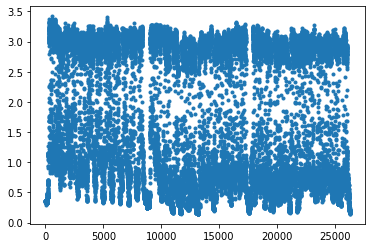

In [34]:
plt.plot(energy_df['Фактическое собственное потребление, МВтч'], '.')

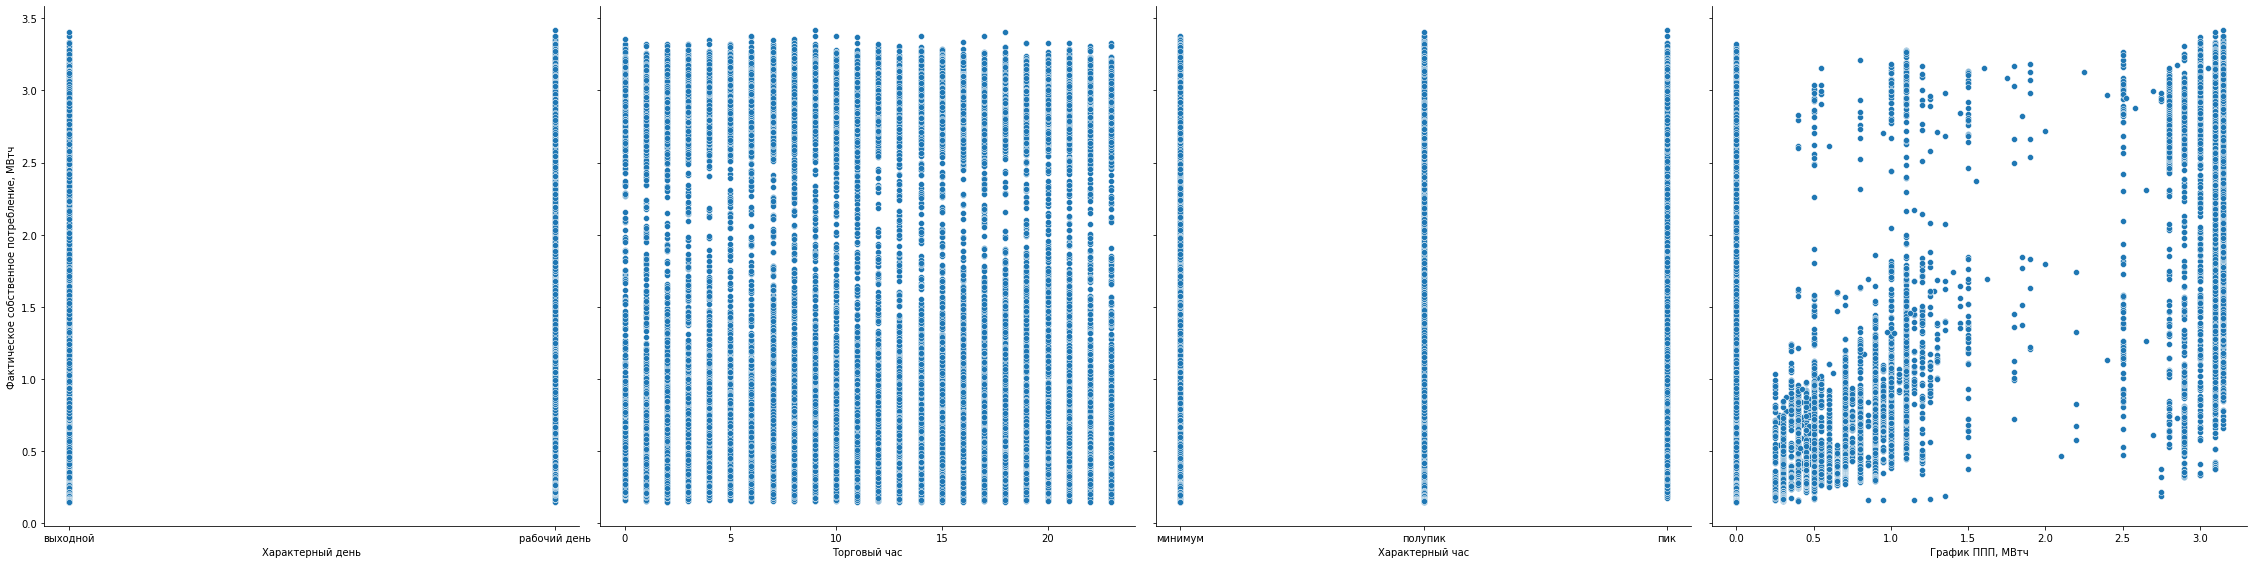

In [35]:
# fig, ax = plt.subplots(2, 2, figsize=(10, 8))

columns_to_plot = ['Характерный день', 'Торговый час', 'Характерный час',
                   'График ППП, МВтч']

g = sns.PairGrid(energy_df, x_vars=columns_to_plot,
                y_vars='Фактическое собственное потребление, МВтч',
                height=8)

g.map(sns.scatterplot)
# sns.scatterplot(data=energy_df, y='Фактическое собственное потребление, МВтч',
                                # x='Торговый час')
# распределение по часам: равномерное


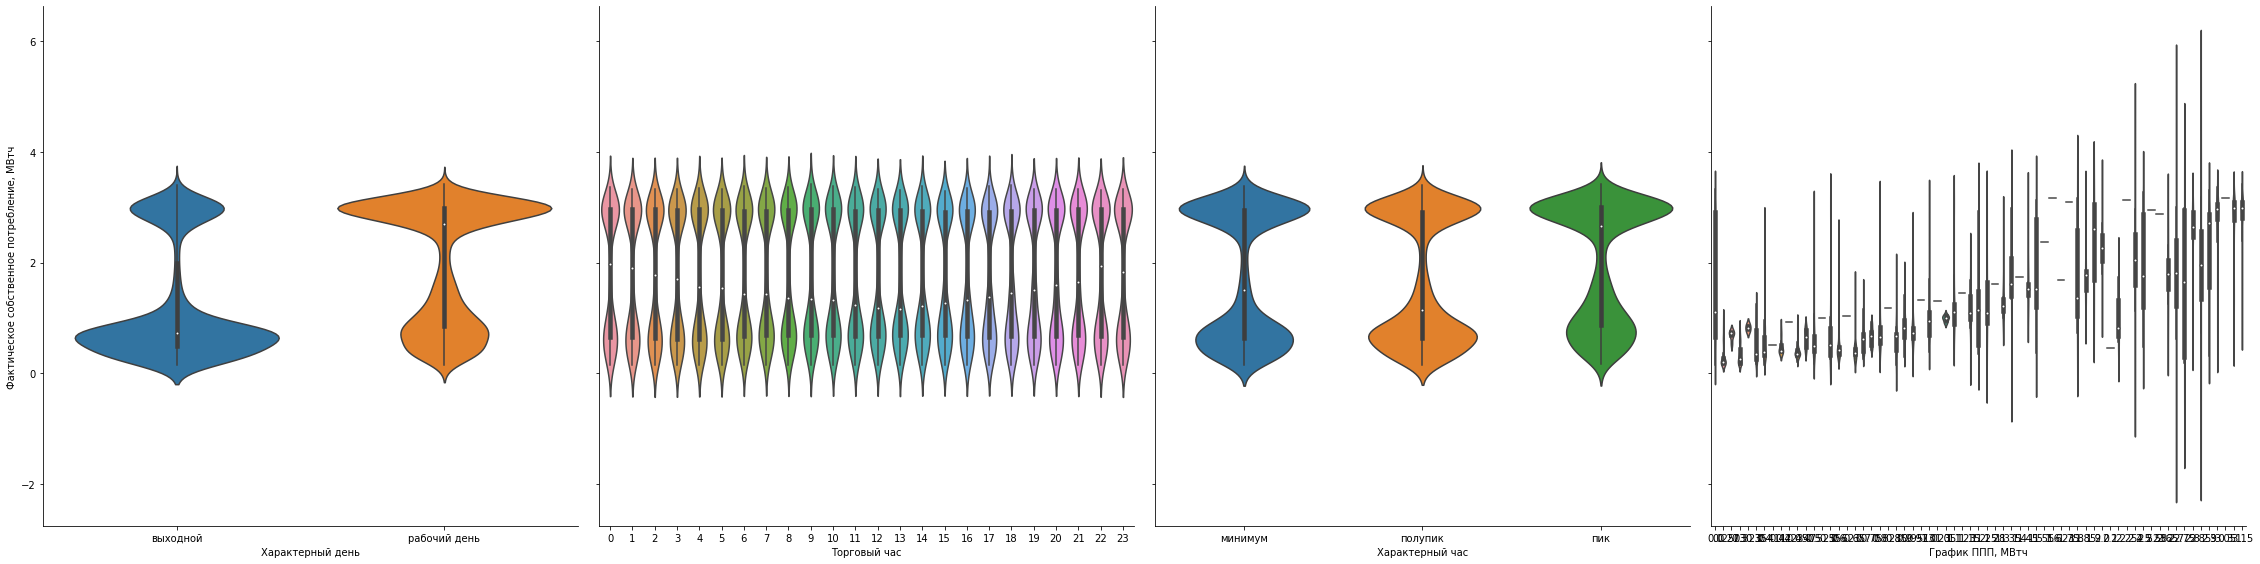

In [36]:
g = sns.PairGrid(energy_df, x_vars=columns_to_plot,
                y_vars='Фактическое собственное потребление, МВтч',
                height=8)

g.map(sns.violinplot)

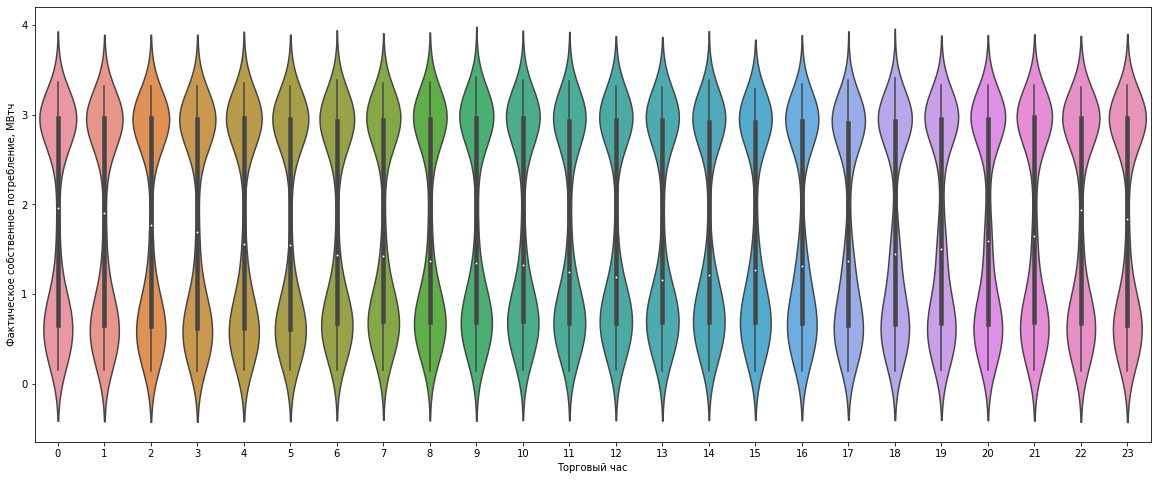

In [37]:
plt.subplots(figsize=(20, 8))
sns.violinplot(data=energy_df, x='Торговый час',
                y='Фактическое собственное потребление, МВтч')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


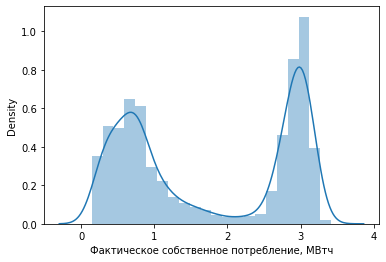

In [38]:
sns.distplot(energy_df['Фактическое собственное потребление, МВтч'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

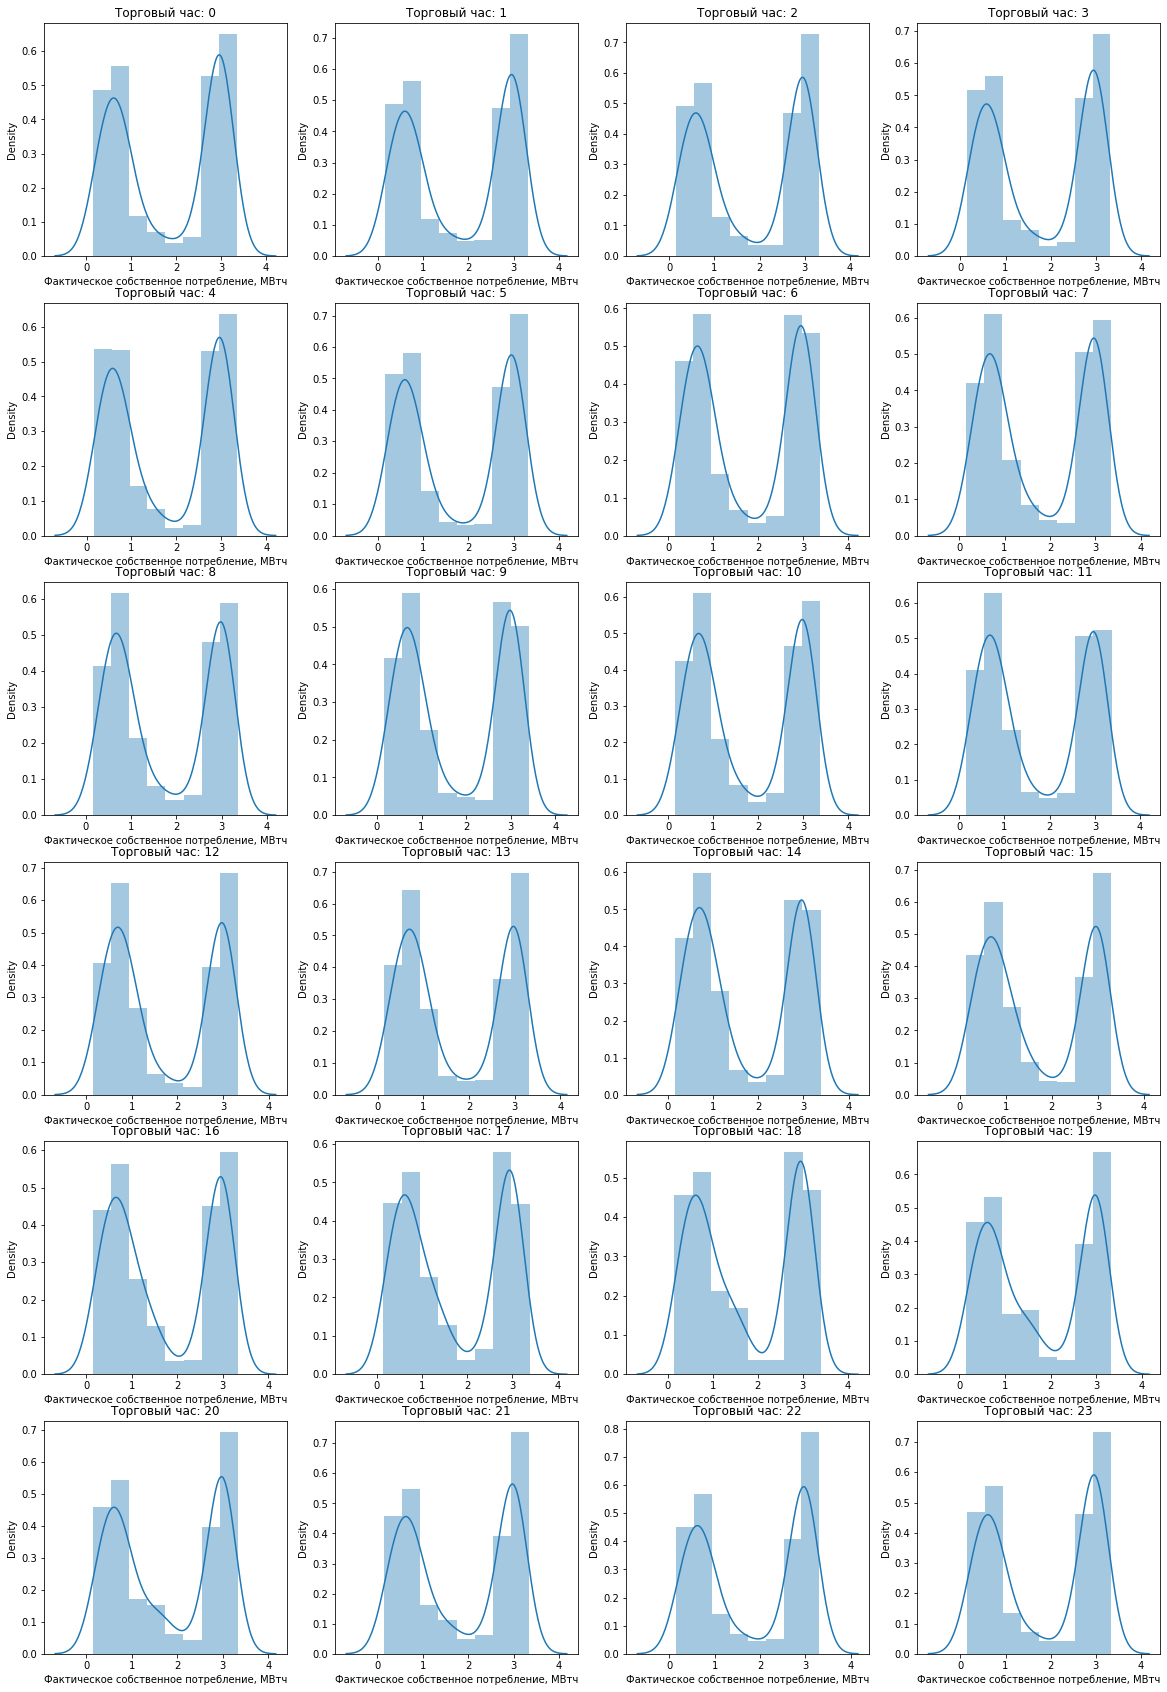

In [39]:
plt.subplots(figsize=(20, 30))

for i in range(24):
    plt.subplot(6, 4, i+1)
    sns.distplot(energy_df[energy_df['Торговый час'] == i]
                 ['Фактическое собственное потребление, МВтч']).set_title('Торговый час: %i' % i)

In [40]:
energy_df['DateTime'].min()

Timestamp('2015-01-01 00:00:00')

In [41]:
# energy_df['DateTime'] == plan_df['DateTime']
# plan_df['DateTime'].min()


# в файле plan.csv отсутствуют записи за несколько месяцев
# (energy.csv начинается с 01.01.2015, а plan.csv с 01.09.2015),
# следовательно необходимо убрать ту часть без записей

energy_df[energy_df['DateTime'] >= plan_df['DateTime'].min()]

DateTime Характерный день  Торговый час Характерный час  \
5832  2015-09-01     рабочий день             0         минимум   
5833  2015-09-01     рабочий день             1         минимум   
5834  2015-09-01     рабочий день             2         минимум   
5835  2015-09-01     рабочий день             3         минимум   
5836  2015-09-01     рабочий день             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       График ППП, МВтч  \
5832                1.1   
5833                1.1   
5834                1.1   
5835                1.1   
5836                2.5   
...                 ...   
26299               0.0   
26300               0.0   
26301               0.0   
26302               0.0   
26303               0.0   

       Объем Торгового графика (скорректированное плановое почасовое потребление) МВт*час  \
5832                                                 1.1                                    
5833                                                 1.1                                    
5834                                                 1.1                                    
5835                                                 1.1                                    
5836                                                 2.5                                    
...                                                  ...                                    
26299                                                0.0                                    
26300                                                0.0                                    
26301                                                0.0                                    
26302                                                0.0                                    
26303                                                0.0                                    

       Объем покупки МВт*час  В т.ч. потери, отнесенные к объему покупки  \
5832                   1.139                                       0.039   
5833                   1.140                                       0.040   
5834                   1.139                                       0.039   
5835                   1.140                                       0.040   
5836                   2.590                                       0.090   
...                      ...                                         ...   
26299                  0.000                                       0.000   
26300                  0.000                                       0.000   
26301                  0.000                                       0.000   
26302                  0.000                                       0.000   
26303                  0.000                                       0.000   

       Фактическое собственное потребление, МВтч  \
5832                                       1.544   
5833                                       1.535   
5834                                       1.365   
5835                                       1.469   
5836                                       1.463   
...                                          ...   
26299                                      0.159   
26300                                      0.152   
26301                                      0.154   
26302                                      0.146   
26303                                      0.145   

       Покупка (+) / Продажа (-) на БР (BR+/-), МВтч  \
5832                                           0.444   
5833                                           0.435   
5834                                           0.265   

In [42]:
new_features = ['DateTime', 'Характерный день', 'Торговый час',
                'Характерный час', 'Фактическое собственное потребление, МВтч']

energy_df_truncated = (energy_df[energy_df['DateTime'] >=               # урезаем таблицу energy_df до признаков new_features
                       plan_df['DateTime'].min()])[new_features].copy() # и по дате (чтобы совпадало с plan_df)

In [43]:
energy_df_truncated

DateTime Характерный день  Торговый час Характерный час  \
5832  2015-09-01     рабочий день             0         минимум   
5833  2015-09-01     рабочий день             1         минимум   
5834  2015-09-01     рабочий день             2         минимум   
5835  2015-09-01     рабочий день             3         минимум   
5836  2015-09-01     рабочий день             4         минимум   
...          ...              ...           ...             ...   
26299 2017-12-31         выходной            19         полупик   
26300 2017-12-31         выходной            20         полупик   
26301 2017-12-31         выходной            21         полупик   
26302 2017-12-31         выходной            22         минимум   
26303 2017-12-31         выходной            23         минимум   

       Фактическое собственное потребление, МВтч  
5832                                       1.544  
5833                                       1.535  
5834                                       1.365  
5835                                       1.469  
5836                                       1.463  
...                                          ...  
26299                                      0.159  
26300                                      0.152  
26301                                      0.154  
26302                                      0.146  
26303                                      0.145  

[20472 rows x 5 columns]

In [44]:
df = pd.merge(energy_df_truncated, plan_df, on='DateTime') # объединяем таблицы энергий и плана по дате

In [45]:
df.columns.shape

(13,)

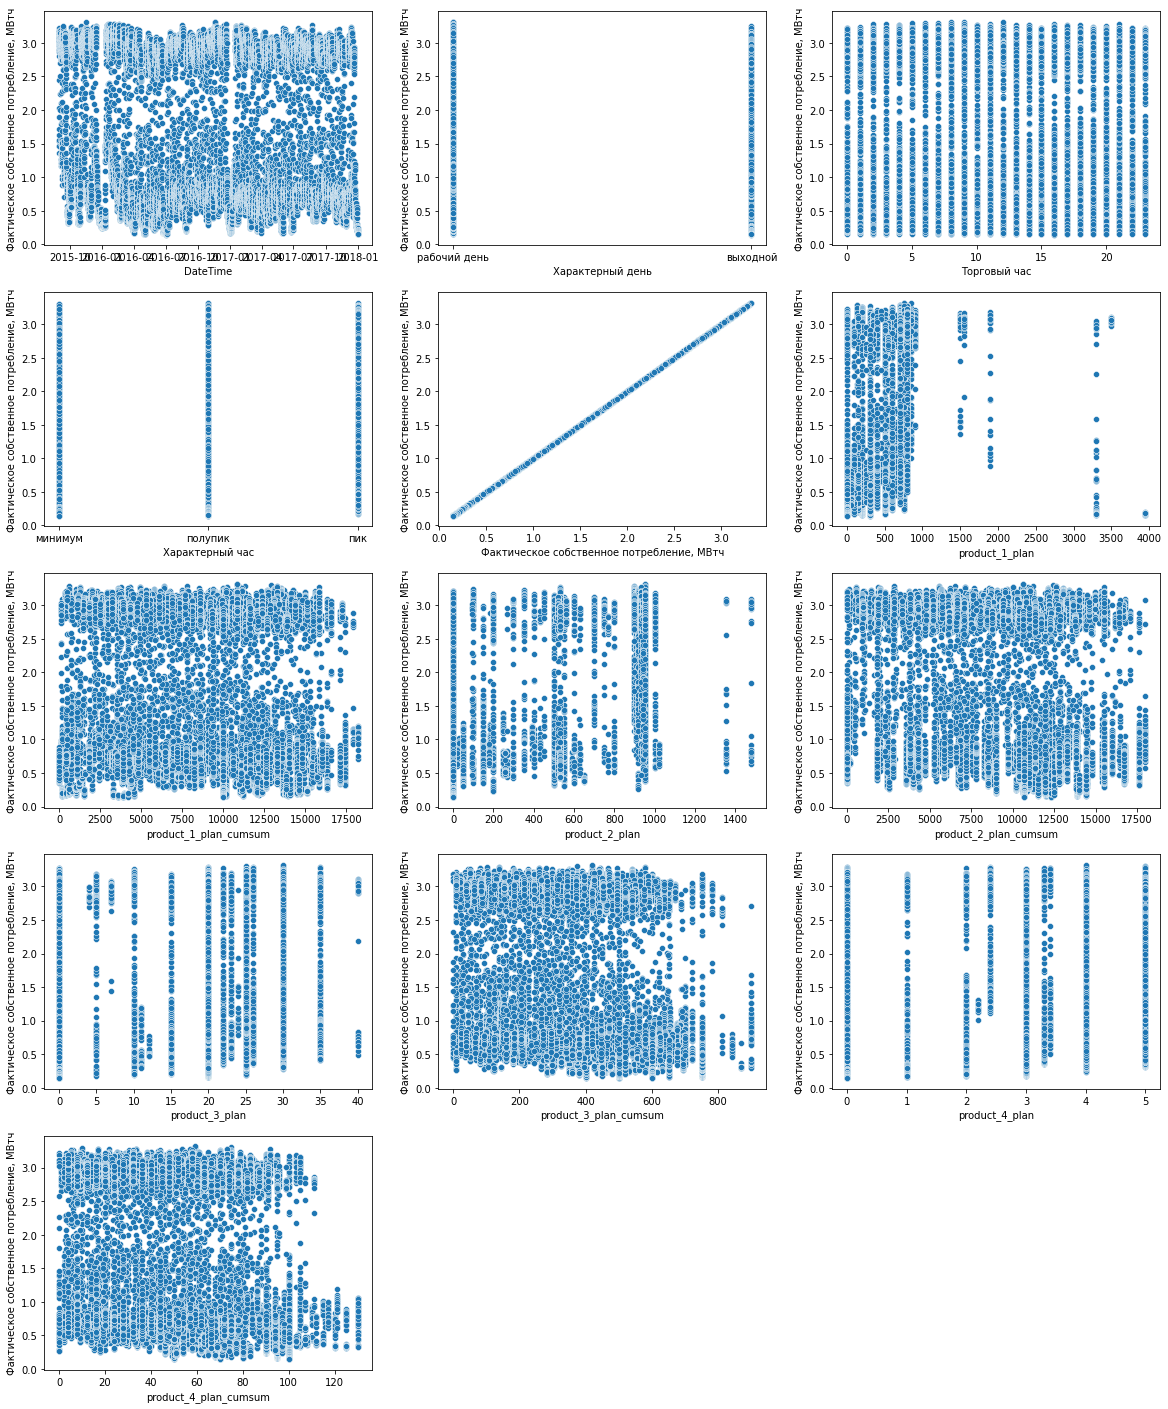

In [46]:
df.columns

plt.subplots(figsize=(20, 25))
for i, col in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(data=df, x=col,
                    y='Фактическое собственное потребление, МВтч')

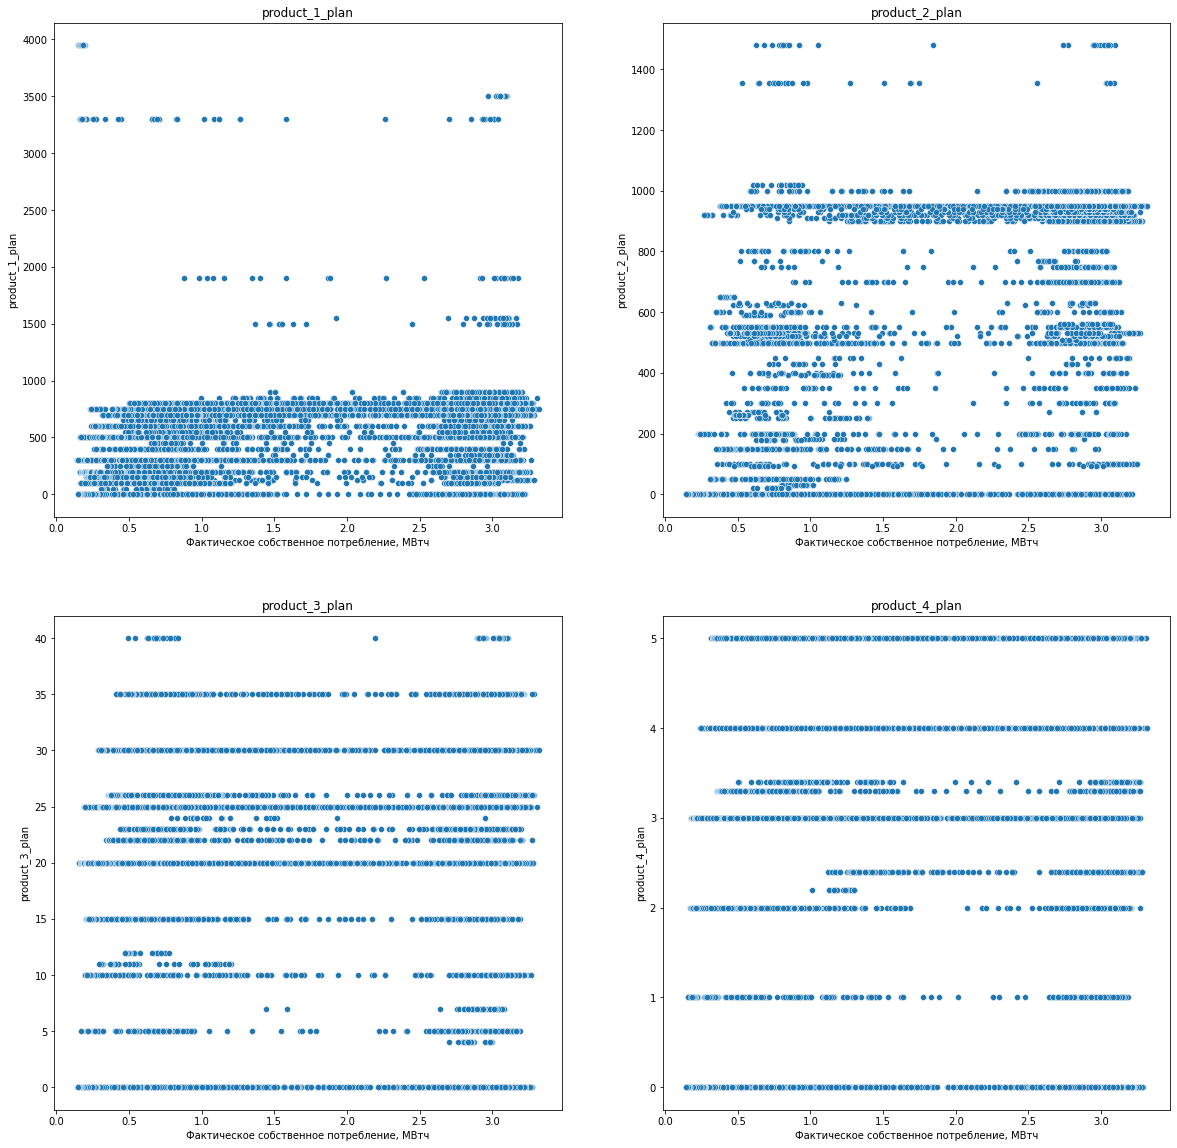

In [47]:
products = ['product_%i_plan' % i for i in range(1, 5)]
plt.subplots(figsize=(20, 20))

for i, prod in enumerate(products):
    plt.subplot(2, 2, i+1)
    sns.scatterplot(x=df['Фактическое собственное потребление, МВтч'],
                   y=df[prod]).set_title(prod)

In [48]:
print(np.corrcoef(df['product_1_plan'], df['product_2_plan']))
print(np.corrcoef(df['product_1_plan'], df['product_3_plan']))
print(np.corrcoef(df['product_1_plan'], df['product_4_plan']))
print(np.corrcoef(df['product_2_plan'], df['product_3_plan']))
print(np.corrcoef(df['product_2_plan'], df['product_3_plan']))
print(np.corrcoef(df['product_3_plan'], df['product_4_plan']))

[[1.         0.50933782]
 [0.50933782 1.        ]]
[[1.        0.2158079]
 [0.2158079 1.       ]]
[[1.         0.28137478]
 [0.28137478 1.        ]]
[[1.         0.20852582]
 [0.20852582 1.        ]]
[[1.         0.20852582]
 [0.20852582 1.        ]]
[[1.         0.54603709]
 [0.54603709 1.        ]]


In [49]:
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_1_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_2_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_3_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['product_4_plan']))
print(np.corrcoef(df['Фактическое собственное потребление, МВтч'], df['Торговый час']))

[[1.         0.52295186]
 [0.52295186 1.        ]]
[[1.         0.85229201]
 [0.85229201 1.        ]]
[[1.         0.25048845]
 [0.25048845 1.        ]]
[[1.       0.293771]
 [0.293771 1.      ]]
[[ 1.         -0.00643857]
 [-0.00643857  1.        ]]


In [50]:
df

DateTime Характерный день  Торговый час Характерный час  \
0     2015-09-01     рабочий день             0         минимум   
1     2015-09-01     рабочий день             1         минимум   
2     2015-09-01     рабочий день             2         минимум   
3     2015-09-01     рабочий день             3         минимум   
4     2015-09-01     рабочий день             4         минимум   
...          ...              ...           ...             ...   
20467 2017-12-31         выходной            19         полупик   
20468 2017-12-31         выходной            20         полупик   
20469 2017-12-31         выходной            21         полупик   
20470 2017-12-31         выходной            22         минимум   
20471 2017-12-31         выходной            23         минимум   

       Фактическое собственное потребление, МВтч  product_1_plan  \
0                                          1.544          1500.0   
1                                          1.535          1500.0   
2                                          1.365          1500.0   
3                                          1.469          1500.0   
4                                          1.463          1500.0   
...                                          ...             ...   
20467                                      0.159             0.0   
20468                                      0.152             0.0   
20469                                      0.154             0.0   
20470                                      0.146             0.0   
20471                                      0.145             0.0   

       product_1_plan_cumsum  product_2_plan  product_2_plan_cumsum  \
0                     1500.0           100.0                  100.0   
1                     1500.0           100.0                  100.0   
2                     1500.0           100.0                  100.0   
3                     1500.0           100.0                  100.0   
4                     1500.0           100.0                  100.0   
...                      ...             ...                    ...   
20467                10000.0             0.0                10700.0   
20468                10000.0             0.0                10700.0   
20469                10000.0             0.0                10700.0   
20470                10000.0             0.0                10700.0   
20471                10000.0             0.0                10700.0   

       product_3_plan  product_3_plan_cumsum  product_4_plan  \
0                25.0                   25.0             5.0   
1                25.0                   25.0             5.0   
2                25.0                   25.0             5.0   
3                25.0                   25.0             5.0   
4                25.0                   25.0             5.0   
...               ...                    ...             ...   
20467             0.0                  600.0             0.0   
20468             0.0                  600.0             0.0   
20469             0.0                  600.0             0.0   
20470             0.0                  600.0             0.0   
20471             0.0                  600.0             0.0   

       product_4_plan_cumsum  
0                        5.0  
1                        5.0  
2                        5.0  
3                        5.0  
4                        5.0  
...                      ...  
20467                  100.0  
20468                  100.0  
20469                  100.0  
20470                  100.0  
20471                  100.0  

[20472 rows x 13 columns]

In [51]:
df = pd.concat((pd.get_dummies(df['Торговый час']), #применим one hot encoding для категориальных данных
                pd.get_dummies(df['Характерный час']),
                pd.get_dummies(df['Характерный день']),
                df), axis=1)

df.drop(columns=['Характерный час', # уберём столбцы с категориями
                 'Характерный день'], inplace=True)

In [52]:
df

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  \
0      1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
1      0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
2      0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
3      0  0  0  1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
4      0  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
...   .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
20467  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   
20468  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20469  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20470  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20471  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   

       20  21  22  23  минимум  пик  полупик  выходной  рабочий день  \
0       0   0   0   0        1    0        0         0             1   
1       0   0   0   0        1    0        0         0             1   
2       0   0   0   0        1    0        0         0             1   
3       0   0   0   0        1    0        0         0             1   
4       0   0   0   0        1    0        0         0             1   
...    ..  ..  ..  ..      ...  ...      ...       ...           ...   
20467   0   0   0   0        0    0        1         1             0   
20468   1   0   0   0        0    0        1         1             0   
20469   0   1   0   0        0    0        1         1             0   
20470   0   0   1   0        1    0        0         1             0   
20471   0   0   0   1        1    0        0         1             0   

        DateTime  Торговый час  Фактическое собственное потребление, МВтч  \
0     2015-09-01             0                                      1.544   
1     2015-09-01             1                                      1.535   
2     2015-09-01             2                                      1.365   
3     2015-09-01             3                                      1.469   
4     2015-09-01             4                                      1.463   
...          ...           ...                                        ...   
20467 2017-12-31            19                                      0.159   
20468 2017-12-31            20                                      0.152   
20469 2017-12-31            21                                      0.154   
20470 2017-12-31            22                                      0.146   
20471 2017-12-31            23                                      0.145   

       product_1_plan  product_1_plan_cumsum  product_2_plan  \
0              1500.0                 1500.0           100.0   
1              1500.0                 1500.0           100.0   
2              1500.0                 1500.0           100.0   
3              1500.0                 1500.0           100.0   
4              1500.0                 1500.0           100.0   
...               ...                    ...             ...   
20467             0.0                10000.0             0.0   
20468             0.0                10000.0             0.0   
20469             0.0                10000.0             0.0   
20470             0.0                10000.0             0.0   
20471             0.0                10000.0             0.0   

       product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
0                      100.0            25.0                   25.0   
1                      100.0            25.0                   25.0   
2                      100.0            25.0                   25.0   
3                      100.0            25.0                   25.0   
4                      100.0            25.0                   25.0   
...                      ...             ...                    ...   
20

In [53]:
df_train = df[df['DateTime'] < '2017-08-01']
df_test = df[df['DateTime'] >= '2017-08-01']

In [54]:
columns_to_drop = ['product_%i_plan_cumsum' %i for i in range(1, 5)]
columns_to_drop.append('DateTime')
columns_to_drop.append('Фактическое собственное потребление, МВтч')
columns_to_drop.append('Торговый час')
columns_to_drop

['product_1_plan_cumsum',
 'product_2_plan_cumsum',
 'product_3_plan_cumsum',
 'product_4_plan_cumsum',
 'DateTime',
 'Фактическое собственное потребление, МВтч',
 'Торговый час']

In [55]:
def try_regressor(regressor):
    regressor.fit(df_train.drop(columns=columns_to_drop),
                  df_train['Фактическое собственное потребление, МВтч'])
    
    preds = regressor.predict(df_test.drop(columns=columns_to_drop))
    y_test = df_test['Фактическое собственное потребление, МВтч'].to_numpy()

    plt.subplots(figsize=(25, 10))

    plt.plot(preds, label='predictions')
    plt.plot(y_test, label='test')
    plt.legend()

    MAE = sklearn.metrics.mean_absolute_error(
        df_test['Фактическое собственное потребление, МВтч'],
                                                    preds)
    plt.title(str(regressor) + f' MAE = {MAE}')

    print(f'MAE = {MAE}')

MAE = 0.27579623219013993


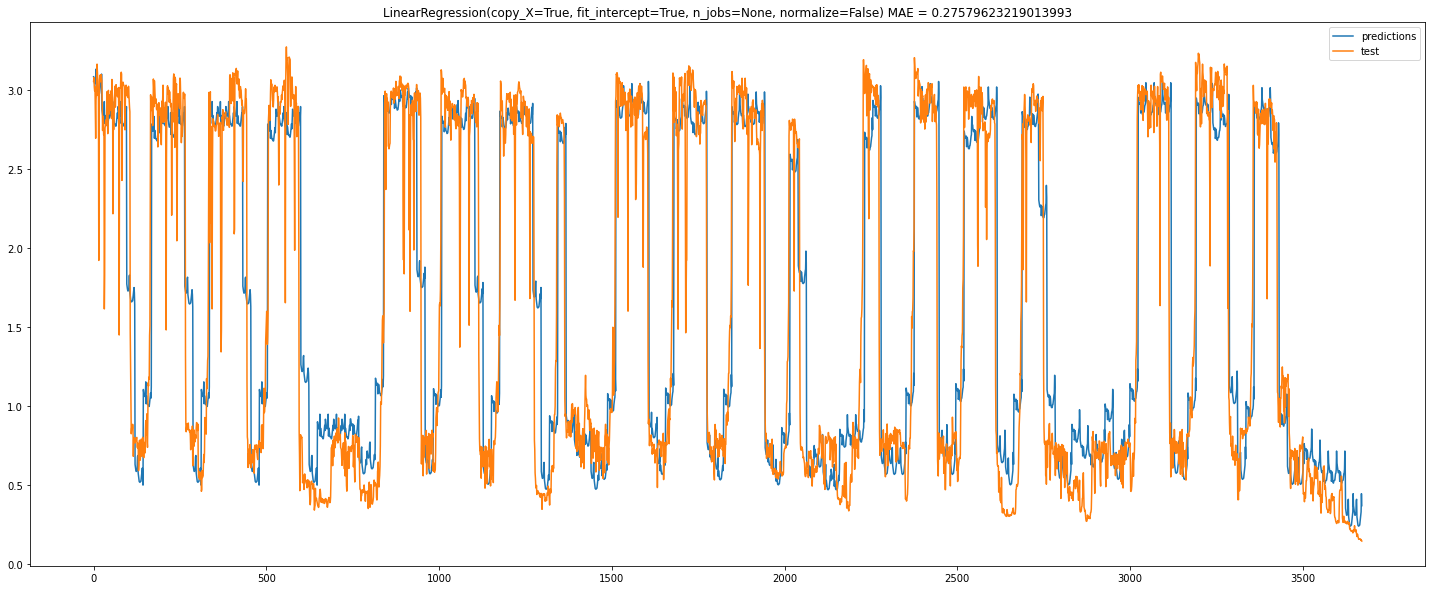

In [56]:
try_regressor(sklearn.linear_model.LinearRegression())

MAE = 0.28175344864226515


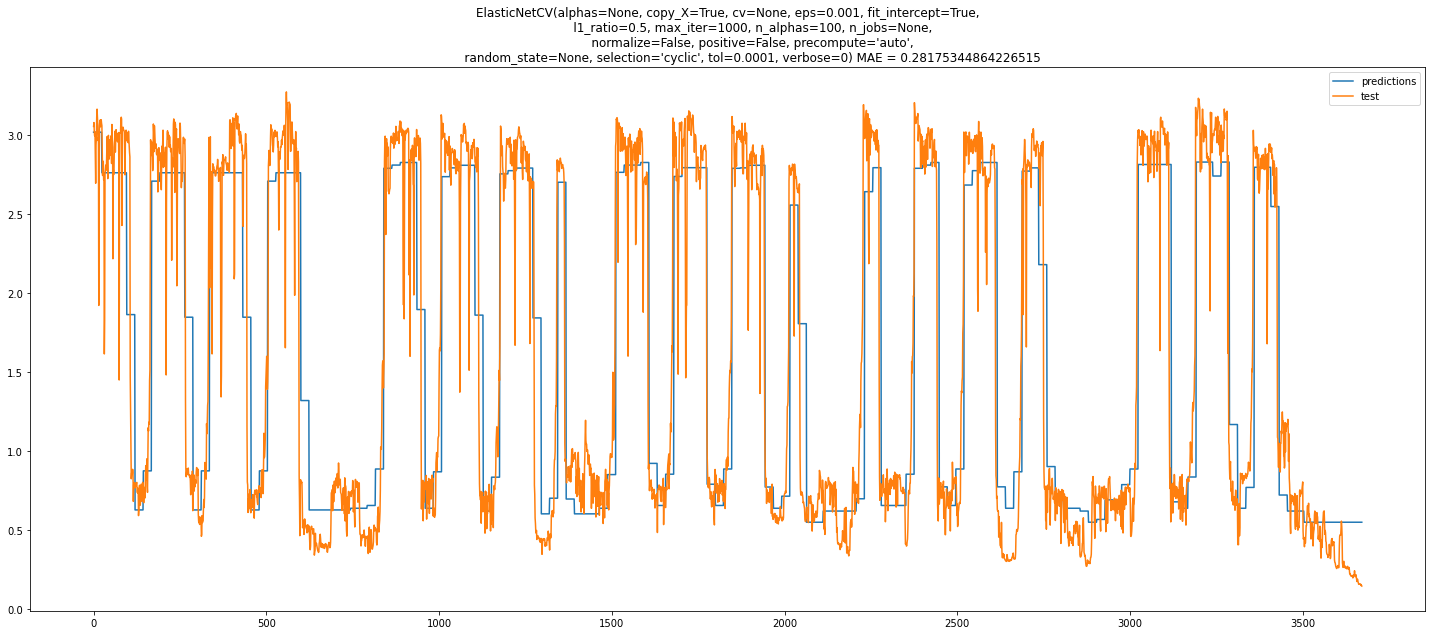

In [57]:
try_regressor(sklearn.linear_model.ElasticNetCV())

MAE = 0.2799608585548821


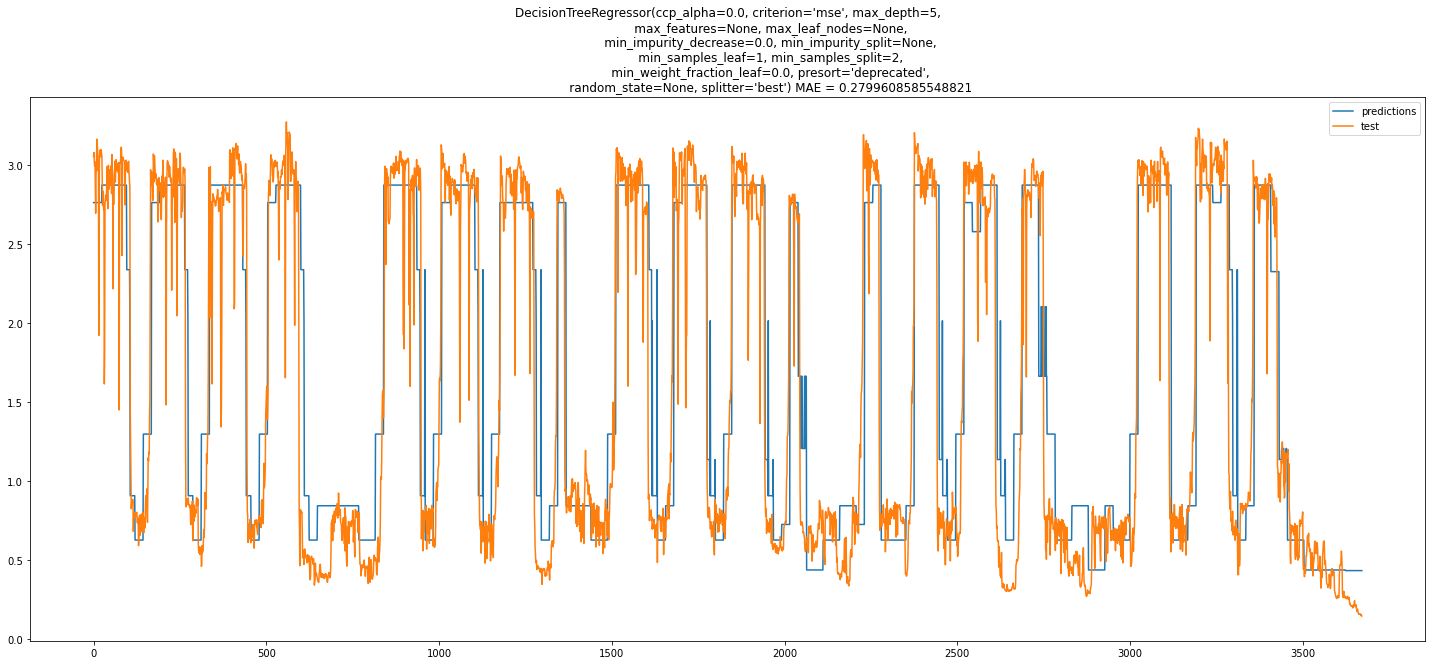

In [58]:
try_regressor(sklearn.tree.DecisionTreeRegressor(max_depth=5))

MAE = 0.2592189835557021


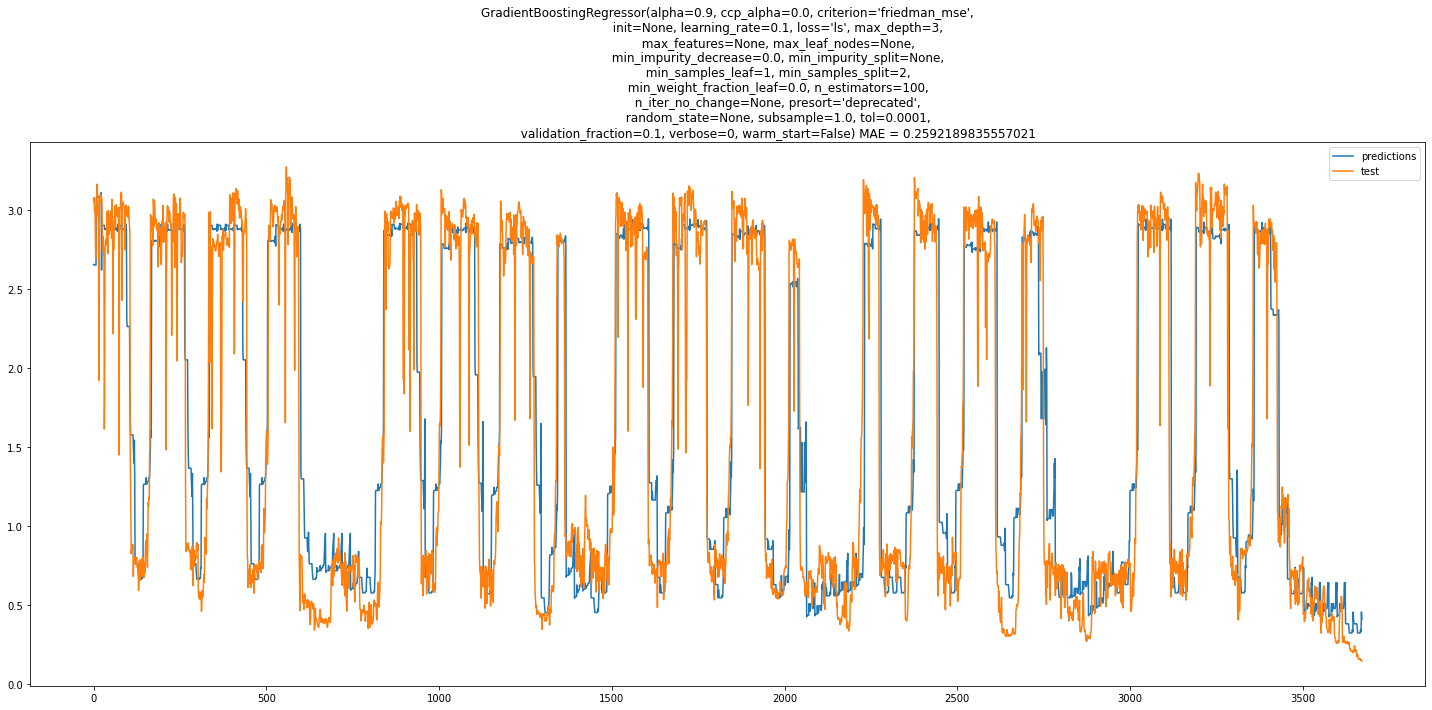

In [59]:
try_regressor(sklearn.ensemble.GradientBoostingRegressor())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


'\n\nМожно заметить, что фатическое потребление имеет два фокуса, вокруг которых\nрасполагаются значения 1й - ~0,7 МВт*ч 2й - ~3 МВт*ч\n\nРазделим все данные на два класса - данные около 1го фокуса и около 2го\nГраница классов пусть находится на величине 2 МВт*ч\n\nПотом, если понадобится, можно изменить координаты фокусов и границы.\n\nВведём два новых признака class и shift, ответ будем искать в виде:\nenergy = class_coordinate + shift\n\n\n'

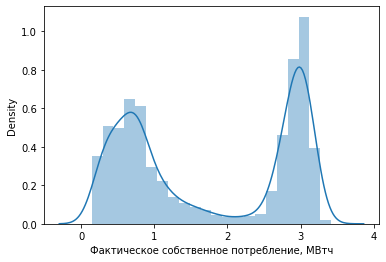

In [60]:
sns.distplot(energy_df['Фактическое собственное потребление, МВтч'])
"""

Можно заметить, что фатическое потребление имеет два фокуса, вокруг которых
располагаются значения 1й - ~0,7 МВт*ч 2й - ~3 МВт*ч

Разделим все данные на два класса - данные около 1го фокуса и около 2го
Граница классов пусть находится на величине 2 МВт*ч

Потом, если понадобится, можно изменить координаты фокусов и границы.

Введём два новых признака class и shift, ответ будем искать в виде:
energy = class_coordinate + shift


"""

In [61]:
# print(df[df['Фактическое собственное потребление, МВтч'] < 2]['Фактическое собственное потребление, МВтч'].mean())
# print(df[df['Фактическое собственное потребление, МВтч'] >= 2]['Фактическое собственное потребление, МВтч'].mean())

# class_0 = (df[df['Фактическое собственное потребление, МВтч'] <
#          df['Фактическое собственное потребление, МВтч'].max() / 2]
#             ['Фактическое собственное потребление, МВтч'].mean())

# print(df[df['Фактическое собственное потребление, МВтч'] >=
#          df['Фактическое собственное потребление, МВтч'].max() / 2]
#       ['Фактическое собственное потребление, МВтч'].mean())

class_0 = 0.7
class_1 = 3.0

class_border = 2.0

In [62]:
df['class'] = -1
df['shift'] = 500

In [63]:
# df[df['Фактическое собственное потребление, МВтч'] < class_border]['class'] = 0
# df[df['Фактическое собственное потребление, МВтч'] >= class_border]['class'] = 1

for i in range(df.shape[0]):
    if (df.loc[i, 'Фактическое собственное потребление, МВтч'] < class_border):
        df.loc[i, 'class'] = 0
        df.loc[i, 'shift'] = df.loc[i, 'Фактическое собственное потребление, МВтч'] - class_0
    else:
        df.loc[i, 'class'] = 1
        df.loc[i, 'shift'] = df.loc[i, 'Фактическое собственное потребление, МВтч'] - class_1

In [64]:
df[df['class'] == -1].empty and df[df['shift'] == 500].empty # проверяем, что все строки заполнены

True

In [65]:
df_train = df[df['DateTime'] < '2017-08-01']
df_test = df[df['DateTime'] >= '2017-08-01']

In [66]:
df

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  \
0      1  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
1      0  1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
2      0  0  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
3      0  0  0  1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
4      0  0  0  0  1  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
...   .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
20467  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   
20468  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20469  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20470  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   
20471  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   

       20  21  22  23  минимум  пик  полупик  выходной  рабочий день  \
0       0   0   0   0        1    0        0         0             1   
1       0   0   0   0        1    0        0         0             1   
2       0   0   0   0        1    0        0         0             1   
3       0   0   0   0        1    0        0         0             1   
4       0   0   0   0        1    0        0         0             1   
...    ..  ..  ..  ..      ...  ...      ...       ...           ...   
20467   0   0   0   0        0    0        1         1             0   
20468   1   0   0   0        0    0        1         1             0   
20469   0   1   0   0        0    0        1         1             0   
20470   0   0   1   0        1    0        0         1             0   
20471   0   0   0   1        1    0        0         1             0   

        DateTime  Торговый час  Фактическое собственное потребление, МВтч  \
0     2015-09-01             0                                      1.544   
1     2015-09-01             1                                      1.535   
2     2015-09-01             2                                      1.365   
3     2015-09-01             3                                      1.469   
4     2015-09-01             4                                      1.463   
...          ...           ...                                        ...   
20467 2017-12-31            19                                      0.159   
20468 2017-12-31            20                                      0.152   
20469 2017-12-31            21                                      0.154   
20470 2017-12-31            22                                      0.146   
20471 2017-12-31            23                                      0.145   

       product_1_plan  product_1_plan_cumsum  product_2_plan  \
0              1500.0                 1500.0           100.0   
1              1500.0                 1500.0           100.0   
2              1500.0                 1500.0           100.0   
3              1500.0                 1500.0           100.0   
4              1500.0                 1500.0           100.0   
...               ...                    ...             ...   
20467             0.0                10000.0             0.0   
20468             0.0                10000.0             0.0   
20469             0.0                10000.0             0.0   
20470             0.0                10000.0             0.0   
20471             0.0                10000.0             0.0   

       product_2_plan_cumsum  product_3_plan  product_3_plan_cumsum  \
0                      100.0            25.0                   25.0   
1                      100.0            25.0                   25.0   
2                      100.0            25.0                   25.0   
3                      100.0            25.0                   25.0   
4                      100.0            25.0                   25.0   
...                      ...             ...                    ...   
20

In [67]:
columns_to_drop_logistic_1 = ['product_%i_plan_cumsum' %i for i in range(1, 5)]
# columns_to_drop_logistic_1 = []
columns_to_drop_logistic_1.append('DateTime')
columns_to_drop_logistic_1.append('Фактическое собственное потребление, МВтч')
columns_to_drop_logistic_1.append('Торговый час')
columns_to_drop_logistic_1.append('shift')
columns_to_drop_logistic_1.append('class') 
columns_to_drop_logistic_1

['product_1_plan_cumsum',
 'product_2_plan_cumsum',
 'product_3_plan_cumsum',
 'product_4_plan_cumsum',
 'DateTime',
 'Фактическое собственное потребление, МВтч',
 'Торговый час',
 'shift',
 'class']

200      3672


0.9446461840229545

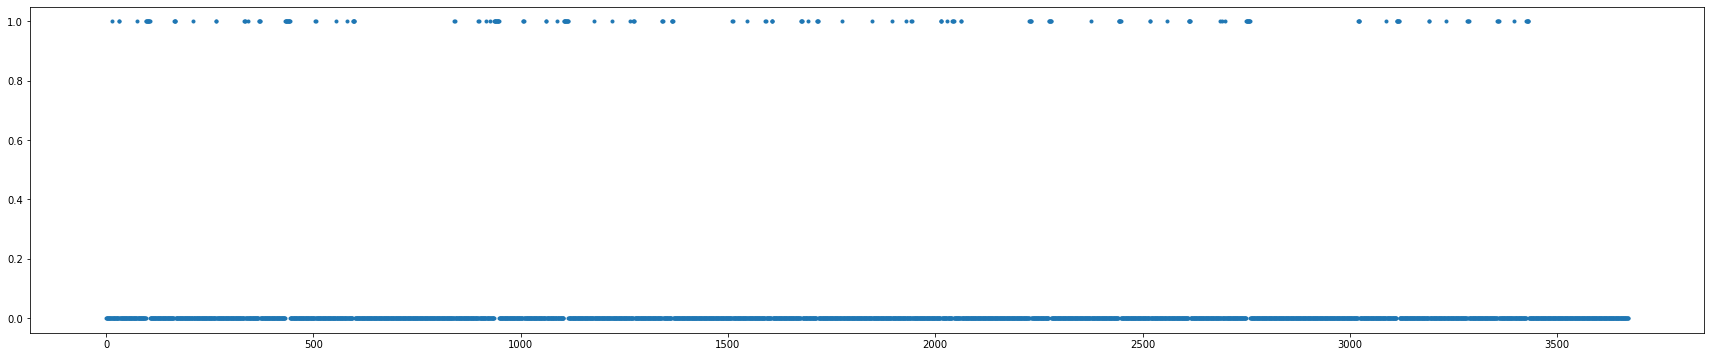

In [69]:
# Классификацию проведём с помощью логистической регрессии

logistic_regr = sklearn.linear_model.LogisticRegressionCV(max_iter=10**5)

logistic_regr.fit(df_train.drop(columns=columns_to_drop_logistic_1),
                  df_train['class'])


logistic_preds = logistic_regr.predict(df_test.drop(columns=columns_to_drop_logistic_1))
y_test = df_test['class'].to_numpy()

print(np.abs(logistic_preds - y_test).sum(), '    ', logistic_preds.shape[0])
# print(np.abs(preds - y_test).sum() / preds.shape[0])

plt.subplots(figsize=(30, 6))
plt.plot(np.abs(logistic_preds - y_test), '.')
sklearn.metrics.balanced_accuracy_score(y_test, logistic_preds)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


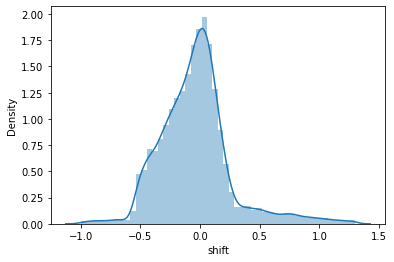

In [70]:
sns.distplot(df['shift'])

In [71]:
def try_regressor_shift(regressor):
    regressor.fit(df_train.drop(columns=columns_to_drop_logistic_1),
                  df_train['shift'])
    
    preds = regressor.predict(df_test.drop(columns=columns_to_drop_logistic_1))
    y_test = df_test['shift'].to_numpy()

    plt.subplots(figsize=(25, 10))

    plt.plot(preds, label='predictions')
    plt.plot(y_test, '--', label='test')
    plt.legend()

    MAE = sklearn.metrics.mean_absolute_error(
        df_test['Фактическое собственное потребление, МВтч'],
                                                    preds)
    plt.title(str(regressor) + f' MAE = {MAE}')

    print(f'MAE = {MAE}')

MAE = 1.6506495621069237


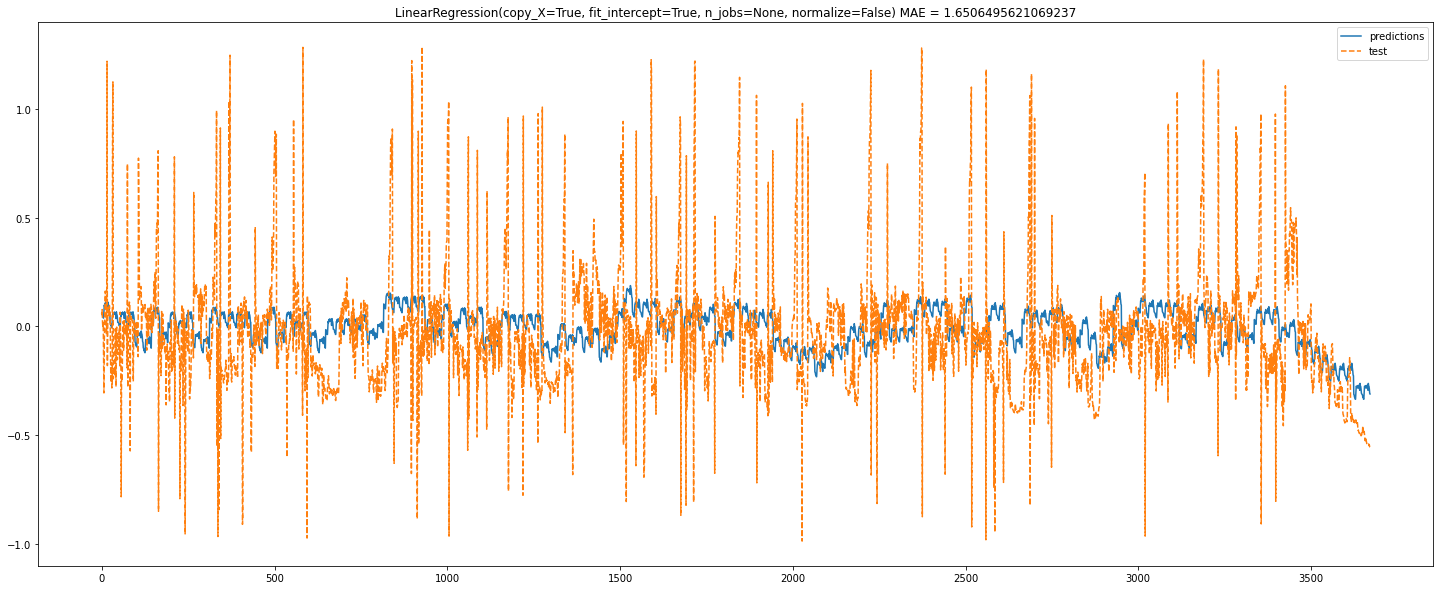

In [72]:
try_regressor_shift(sklearn.linear_model.LinearRegression())

MAE = 1.6641458220640264


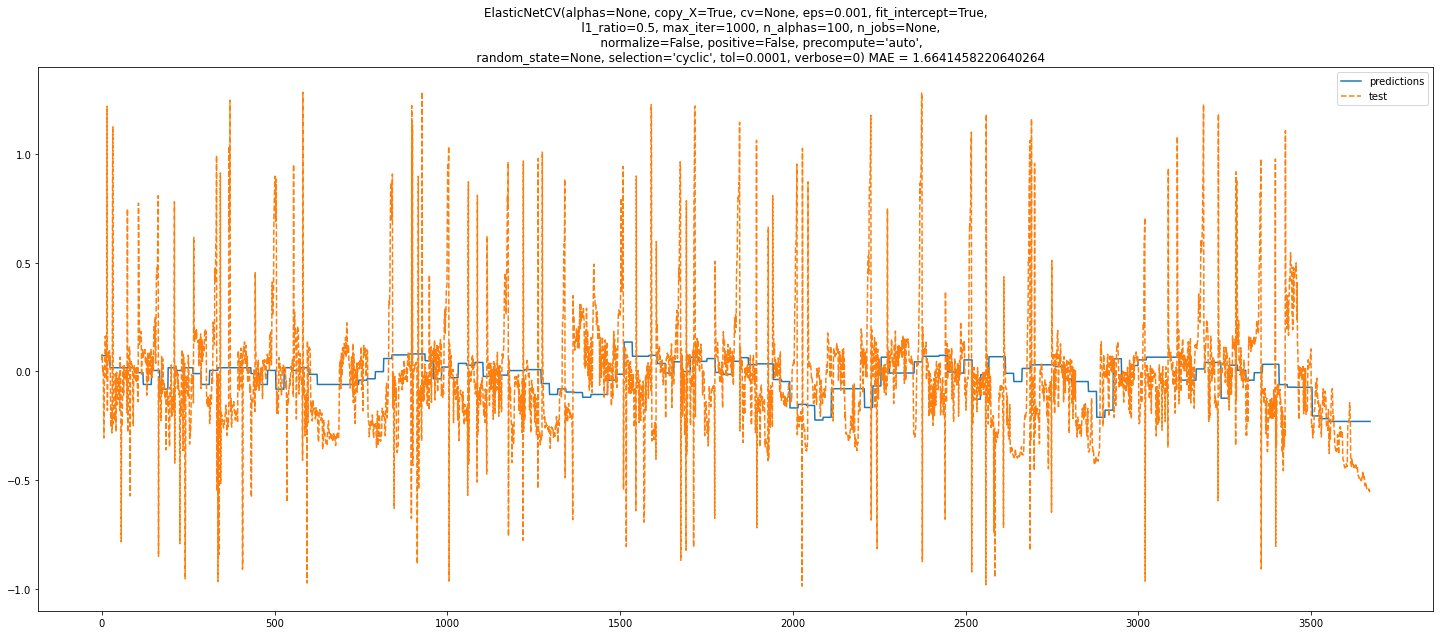

In [73]:
try_regressor_shift(sklearn.linear_model.ElasticNetCV())

MAE = 1.6774976678570435


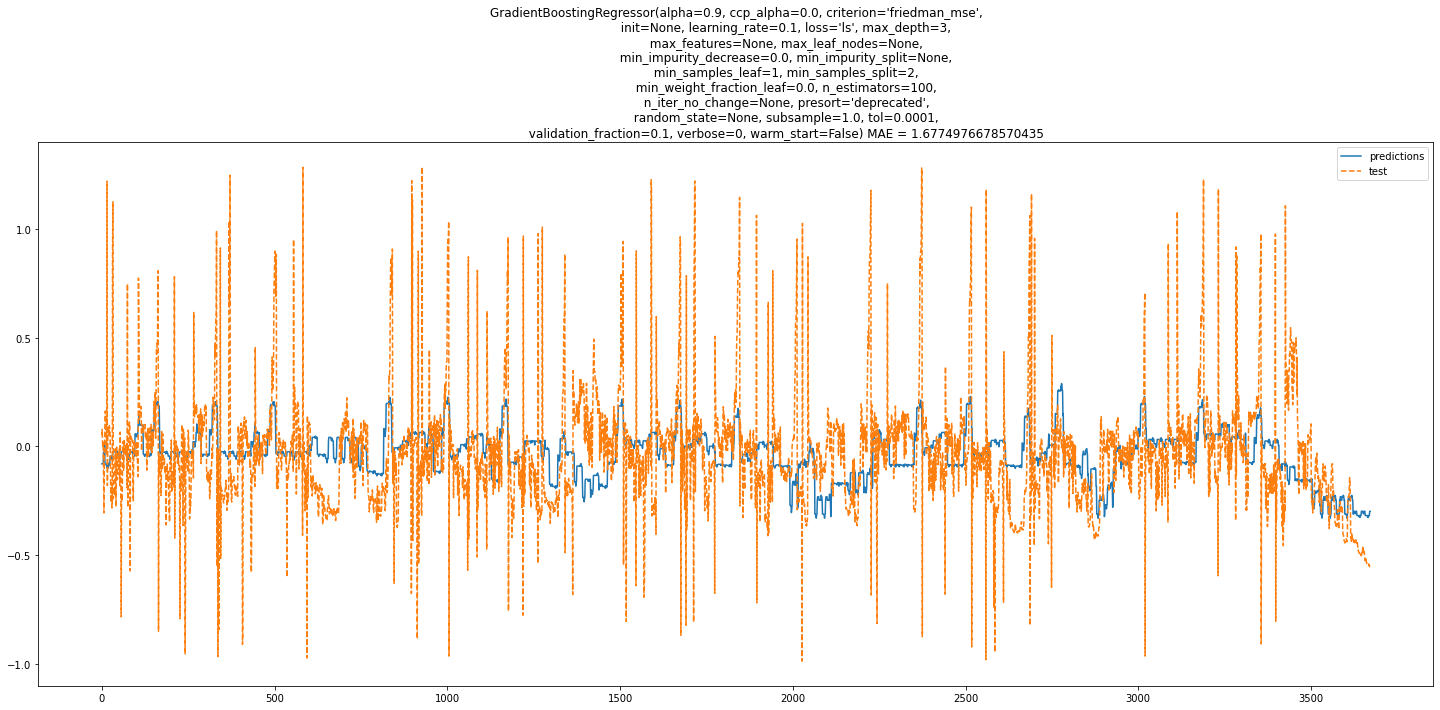

In [76]:
try_regressor_shift(sklearn.ensemble.GradientBoostingRegressor())

0.26963023330282876


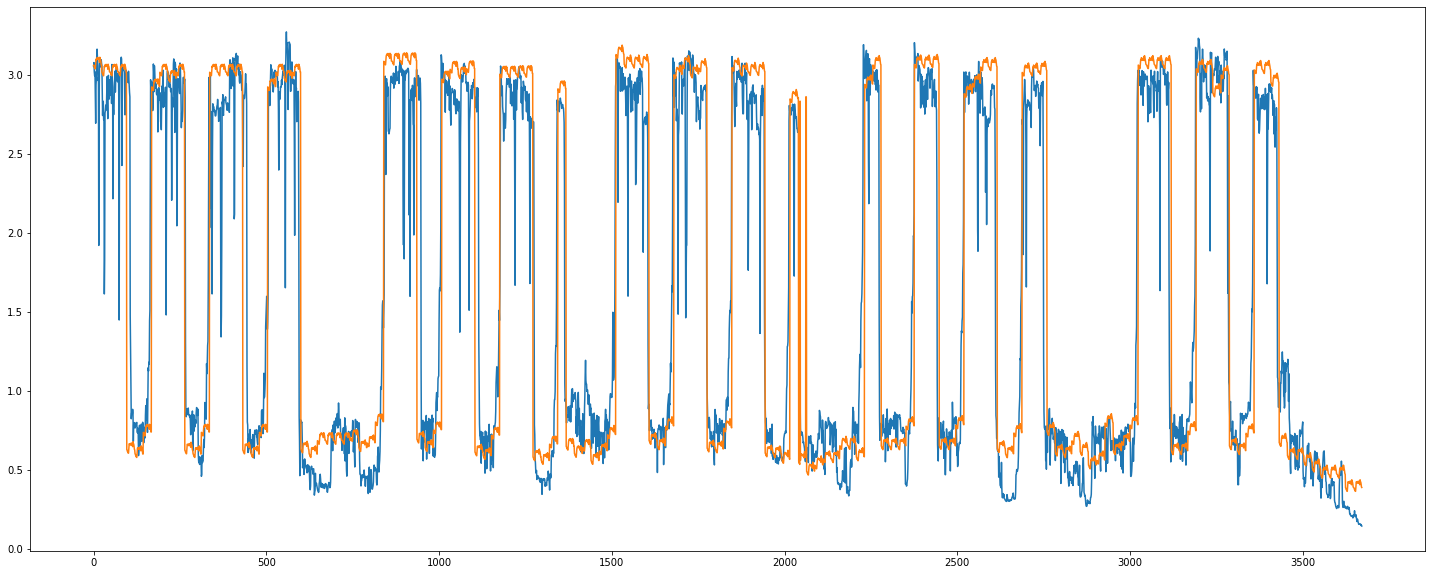

In [77]:
class_preds = (class_1 - class_0) * logistic_preds + class_0 #переходим от меток классов к координатам их фокусов

shift_regr = sklearn.linear_model.LinearRegression()
shift_regr.fit(df_train.drop(columns=columns_to_drop_logistic_1),
                  df_train['shift'])
    
shift_preds = shift_regr.predict(df_test.drop(columns=columns_to_drop_logistic_1))
y_test = df_test['shift'].to_numpy()

energy_consumtion_pred = class_preds + shift_preds

print(sklearn.metrics.mean_absolute_error(df_test['Фактическое собственное потребление, МВтч'],
                                    energy_consumtion_pred))

plt.subplots(figsize=(25, 10))
plt.plot(df_test['Фактическое собственное потребление, МВтч'].to_numpy())
# plt.axhline(y=2.5, color='g', linestyle='--')
plt.plot(energy_consumtion_pred)

In [78]:
class_border = 2.5 #передвинем границу классов

for i in range(df.shape[0]):
    if (df.loc[i, 'Фактическое собственное потребление, МВтч'] < class_border):
        df.loc[i, 'class'] = 0
        df.loc[i, 'shift'] = df.loc[i, 'Фактическое собственное потребление, МВтч'] - class_0
    else:
        df.loc[i, 'class'] = 1
        df.loc[i, 'shift'] = df.loc[i, 'Фактическое собственное потребление, МВтч'] - class_1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


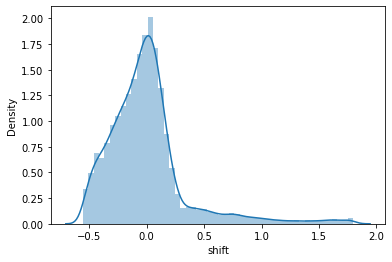

In [79]:
sns.distplot(df['shift'])

200      3672


0.9446461840229545

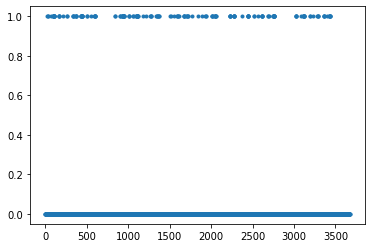

In [80]:
logistic_regr_25 = sklearn.linear_model.LogisticRegressionCV(max_iter=10**5)

logistic_regr_25.fit(df_train.drop(columns=columns_to_drop_logistic_1),
                  df_train['class'])


logistic_preds = logistic_regr.predict(df_test.drop(columns=columns_to_drop_logistic_1))
y_test = df_test['class'].to_numpy()

print(np.abs(logistic_preds - y_test).sum(), '    ', logistic_preds.shape[0])
# print(np.abs(preds - y_test).sum() / preds.shape[0])

plt.plot(np.abs(logistic_preds - y_test), '.')
sklearn.metrics.balanced_accuracy_score(y_test, logistic_preds)


0.26963023330282876


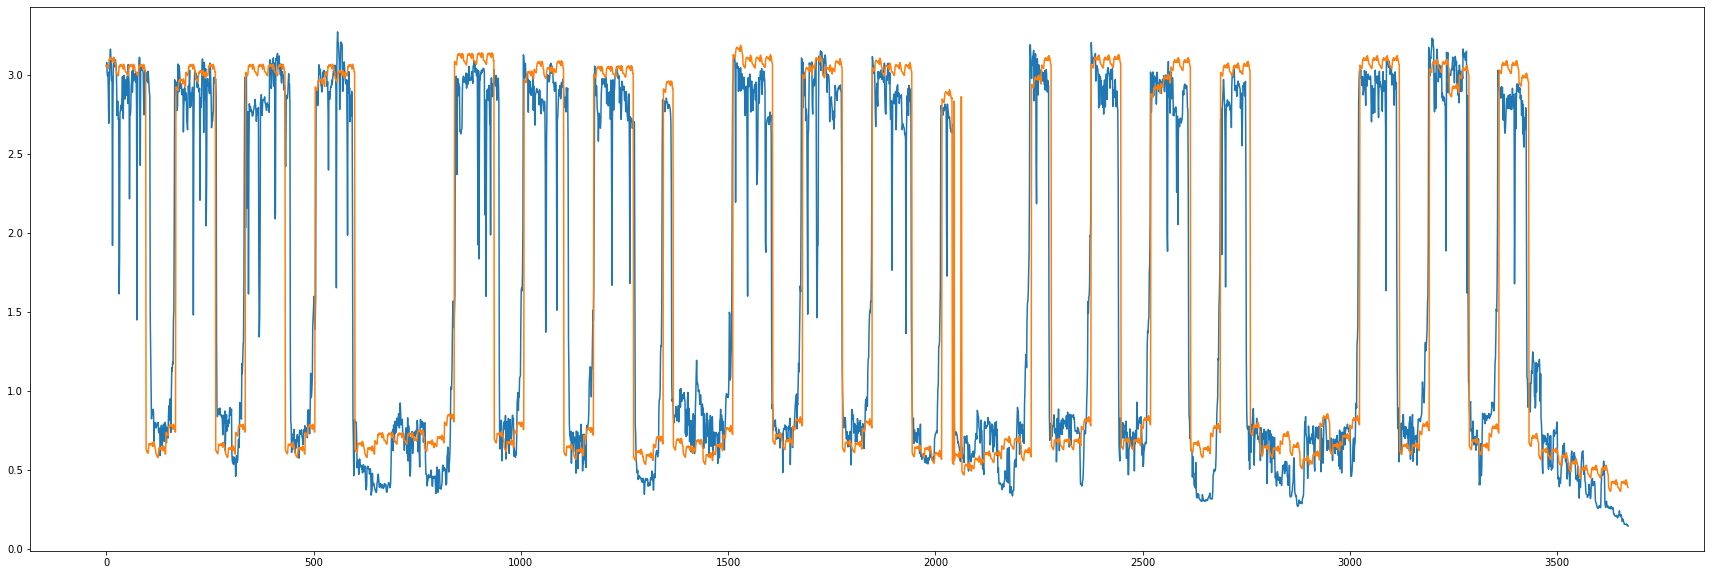

In [86]:
class_preds = (class_1 - class_0) * logistic_preds + class_0 #переходим от меток классов к координатам их фокусов

shift_regr = sklearn.linear_model.LinearRegression()
# shift_regr = sklearn.ensemble.GradientBoostingRegressor()
shift_regr.fit(df_train.drop(columns=columns_to_drop_logistic_1),
                  df_train['shift'])
    
shift_preds = shift_regr.predict(df_test.drop(columns=columns_to_drop_logistic_1))
y_test = df_test['shift'].to_numpy()

energy_consumtion_pred = class_preds + shift_preds

print(sklearn.metrics.mean_absolute_error(df_test['Фактическое собственное потребление, МВтч'],
                                    energy_consumtion_pred))

plt.subplots(figsize=(30, 10))
plt.plot(df_test['Фактическое собственное потребление, МВтч'].to_numpy())
# plt.axhline(y=2.5, color='g', linestyle='--')
plt.plot(energy_consumtion_pred)

MAE =  0.25677777806111424


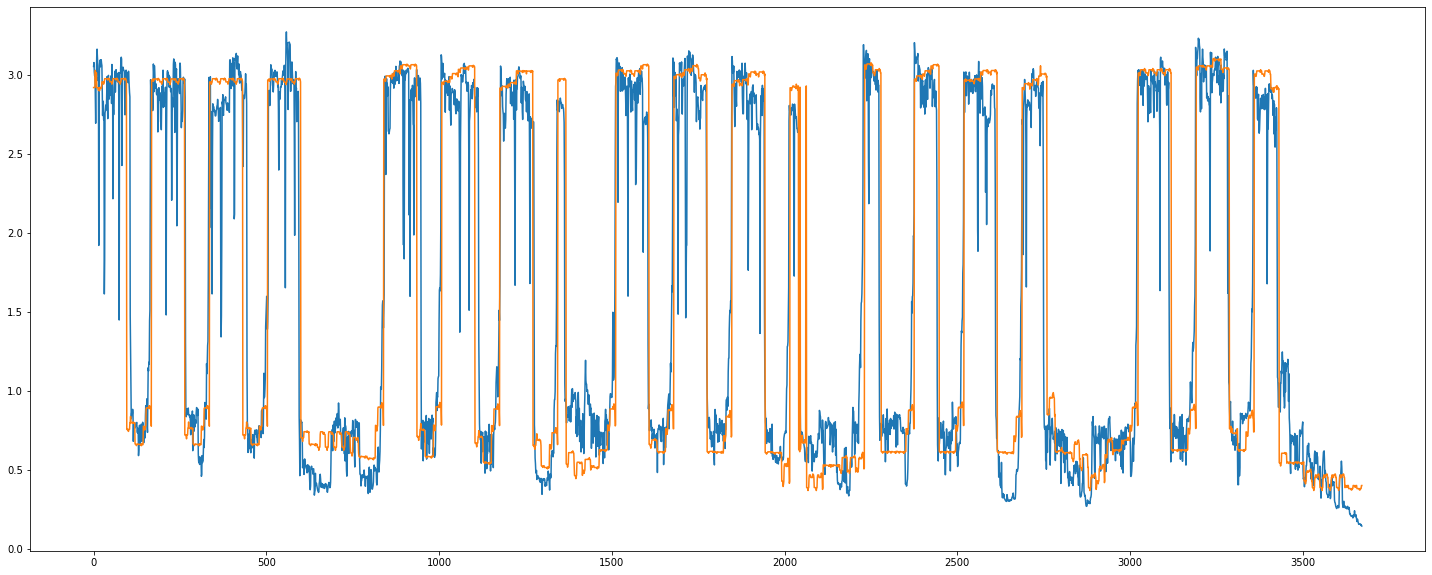

In [85]:
class_preds = (class_1 - class_0) * logistic_preds + class_0 #переходим от меток классов к координатам их фокусов

# shift_regr = sklearn.linear_model.LinearRegression()
shift_regr = sklearn.ensemble.GradientBoostingRegressor()
shift_regr.fit(df_train.drop(columns=columns_to_drop_logistic_1),
                  df_train['shift'])
    
shift_preds = shift_regr.predict(df_test.drop(columns=columns_to_drop_logistic_1))
y_test = df_test['shift'].to_numpy()

energy_consumtion_pred = class_preds + shift_preds

print('MAE = ', sklearn.metrics.mean_absolute_error(df_test['Фактическое собственное потребление, МВтч'],
                                    energy_consumtion_pred))

plt.subplots(figsize=(25, 10))
plt.plot(df_test['Фактическое собственное потребление, МВтч'].to_numpy())
# plt.axhline(y=2.5, color='g', linestyle='--')
plt.plot(energy_consumtion_pred)

In [ ]:
"""
Поробуем построить модель с обратной связью - на вход помимо всего прочего
будем подавать ещё энергопотребление с предыдущего шага (предсказанное)


спойлер: очень плохо работает

"""

# df_mem_train = df_train.copy()
# df_mem_train['energy_i-1'] = -1

# for i in range(1, df_train.shape[0]):
#     df_mem_train.loc[i, 'energy_i-1'] = df_train.loc[i-1, 'Фактическое собственное потребление, МВтч']


In [ ]:
# df_mem_train.drop(index=0, inplace=True)
# df_mem_train.drop(columns=['class', 'shift',
#                            'product_1_plan_cumsum',
#                            'product_2_plan_cumsum',
#                            'product_3_plan_cumsum',
#                            'product_4_plan_cumsum'], inplace=True)

In [ ]:
# df_mem_train

In [ ]:
# df_test

In [ ]:
# df_test.drop(columns=['product_1_plan_cumsum',
#                       'product_2_plan_cumsum',
#                       'product_3_plan_cumsum',
#                       'product_4_plan_cumsum'], inplace=True)

In [ ]:
# df_train['Фактическое собственное потребление, МВтч']

In [ ]:
# df_test
# tmp.to_numpy().reshape(1, -1)

In [ ]:
# cols2drop = ['DateTime',
#              'Фактическое собственное потребление, МВтч',
#              'Торговый час']


# model = sklearn.linear_model.LinearRegression()
# model.fit(df_mem_train.drop(columns=cols2drop),
#           df_train['Фактическое собственное потребление, МВтч'].drop(index=0))

# calculated = pd.DataFrame(columns=df_mem_train.columns)
# calculated.loc[0, 'energy_pred'] = -1
# tmp = df_test.iloc[0,:].drop(index=['DateTime',
#                                     'Фактическое собственное потребление, МВтч',
#                                     'Торговый час',
#                                     'class',
#                                     'shift']).copy()
# tmp['energy_i-1'] = df_mem_train.loc[df_mem_train.shape[0], 'energy_i-1']
# # tmp['energy_pred'] = model.p

# for i in range(df_test.shape[0]):
#     pred = model.predict(tmp.to_numpy().reshape(1, -1))
#     tmp['energy_pred'] = pred
#     colculated = pd.concat([calculated, tmp])
#     df_test.drop(index=16800+i, inplace=True)
#     tmp = df_test.iloc[0,:].drop(index=['DateTime',
#                                     'Фактическое собственное потребление, МВтч',
#                                     'Торговый час',
#                                     'class',
#                                     'shift']).copy()
#     tmp['energy_i-1'] = pred









In [ ]:
# x_train = df_mem_train.drop(columns=['DateTime',
#                                      'Торговый час',
#                                      'Фактическое собственное потребление, МВтч']).to_numpy()
# y_train = df_mem_train['Фактическое собственное потребление, МВтч'].to_numpy()

# x_test = df_test.drop(columns=['DateTime',
#                                'Торговый час',
#                                'Фактическое собственное потребление, МВтч',
#                                'class',
#                                'shift']).to_numpy()

# y_true = df_test['Фактическое собственное потребление, МВтч'].to_numpy()

# model = sklearn.linear_model.LinearRegression()
# model.fit(x_train, y_train)



# tmp = x_test[0, :]
# tmp = np.append(tmp, df_mem_train.loc[df_mem_train.shape[0],
#                                      'energy_i-1']).reshape(1, -1)

# predictions = np.array([])

# for i in range(x_test.shape[0] - 1):
#     pred = model.predict(tmp)
#     predictions = np.append(predictions, pred)
#     tmp = x_test[i+1, :]
#     tmp = np.append(tmp, pred).reshape(1, -1)

# predictions = np.append(predictions,
#                         model.predict(tmp))

In [ ]:
# plt.subplots(figsize=(30, 10))

# plt.plot(y_true)
# plt.plot(predictions)

# print(f'MAE = {sklearn.metrics.mean_absolute_error(y_true, predictions)}')

In [ ]:
# df_mem_train.drop(columns=['DateTime',
#                                      'Торговый час',
#                                      'Фактическое собственное потребление, МВтч'])